# Определение перспективного тарифа для телеком-компании


**Автор:**  
Григорьев Павел


**Описание проекта:**

Коммерческий департамент компании «Мегалайн», федерального оператора сотовой связи, стремится оптимизировать рекламный бюджет, выяснив, какой из тарифных планов - «Смарт» или «Ультра» - приносит больше дохода. Для этого необходимо провести предварительный анализ на основе данных 500 пользователей, включая информацию о тарифах, количестве звонков и сообщений за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод - какой тариф лучше.

**Цель:**  

Провести анализ данных 500 пользователей компании «Мегалайн» для определения более прибыльного тарифного плана («Смарт» или «Ультра») и оптимизации рекламного бюджета.

**Источники данных:**  

Данные о пользователях и тарифных планах предоставлены компанией «Мегалайн».

**Условия проведения анализа днных:**  

Для анализ будут использоваться данные с 1 января 2018 по 31 декабря 2018 года

## Загрузка библиотек <skip>

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import plotly.express as px
import pagri_data_tools  # type: ignore
pd.set_option('display.max_columns', None)

## Описание и изучение данных


### Описание данных


Описание тарифов

- Тариф «Смарт»

    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

- Тариф «Ультра»

    - Ежемесячная плата: 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.


**Таблица users (информация о пользователях):**


- user_id - уникальный идентификатор пользователя
- first_name - имя пользователя
- last_name - фамилия пользователя
- age - возраст пользователя (годы)
- reg_date - дата подключения тарифа (день, месяц, год)
- churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city - город проживания пользователя
- tarif - название тарифного плана

**Таблица calls (информация о звонках):**

- id - уникальный номер звонка
- call_date - дата звонка
- duration - длительность звонка в минутах
- user_id - идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**


- id - уникальный номер сообщения
- message_date - дата сообщения
- user_id - идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

- id - уникальный номер сессии
- mb_used - объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date - дата интернет-сессии
- user_id - идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

- tariff_name - название тарифа
- rub_monthly_fee - ежемесячная абонентская плата в рублях
- minutes_included - количество минут разговора в месяц, включённых в абонентскую плату
- messages_included - количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute - стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message - стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Изучение данных


#### Изучение переменных


##### Таблица users (информация о пользователях)

In [61]:
dtype = {'city': 'category', 'tariff': 'category'}
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv', dtype=dtype
                       , parse_dates=['reg_date', 'churn_date'], date_format='%Y-%m-%d')
df_users.sample(5, random_state=7)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
308,1308,52,NaT,Москва,Инесса,Корнилова,2018-01-04,smart
13,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra
414,1414,70,NaT,Владимир,Александра,Лобанова,2018-05-05,smart
32,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart
460,1460,64,NaT,Ижевск,Арина,Абашкина,2018-04-06,smart


Изучим каждый столбец отдельно.

In [62]:
gen = pagri_data_tools.info_gen(df_users)
next(gen)

Rows,Features,RAM (Mb),Duplicates,Dupl (sub - origin)
500,8,0,---,---


In [ ]:
gen = pagri_data_tools.info_gen(df_users)

In [ ]:

    
# Пример использования
gen = info_gen()

# Получаем значения по умолчанию
print(gen.next())  # Вывод: a 0

# Меняем режим на 'else'
print(gen.next())  # Вывод: else 0

# Меняем режим обратно на 'a'
print(gen.next())  # Вывод: a 1

# Получаем еще одно значение
print(gen.next())  # Вывод: a 2

# Достигнем конца генератора
for _ in range(7):  # Получим оставшиеся значения
    print(gen.next())  # Вывод: a 3, a 4, a 5, a 6, a 7, a 8, a 9

# Попробуем вызвать next после окончания генератора
print(gen.next())  # Вывод: None

0
1
2
3
4
5
6
7
8
9
Generator has finished
Generator has finished


In [98]:
next(gen)

0

In [104]:
next(gen)

0

In [ ]:
next(gen)

First date,2018-08-17 00:00:00,,Zeros,---,,Years missing,0%,
Last date,2018-12-30 00:00:00,,Missing,462 (92%),,Months missing,0%,
Values,38 (8%),,Distinct,33 (7%),,Weeks missing,30%,
RAM (Mb),<1 Mb,,Duplicates,466 (93%),,Days missing,76%,


**Наблюдения:**  

- В колонке с датой прекращения пользования тарифом 92 % пропусков. Значит 92 % пользователей ещё пользуются таррифом.
- Есть пропущенные недели и дни, но в данном случае это нормально.  


In [ ]:
next(gen)

First date,2018-01-01 00:00:00,,Zeros,---,,Years missing,0%,
Last date,2018-12-31 00:00:00,,Missing,---,,Months missing,0%,
Values,500 (100%),,Distinct,270 (54%),,Weeks missing,0%,
RAM (Mb),<1 Mb,,Duplicates,230 (46%),,Days missing,26%,


**Наблюдения:**  

- В колонке с датой подключения тарифа 26 % дней пропущено.


Values,500 (100%),,Max,1 499,,Avg,1 249.5,,1 000 <1%
Missing,---,,95%,1 474.05,,Mode,---,,1 329 <1%
Distinct,500 (100%),,75%,1 374.25,,Range,499,,1 342 <1%
Duplicates,---,,Median,1 249.5,,iQR,249.5,,1 341 <1%
Zeros,---,,25%,1 124.75,,std,144.48,,1 340 <1%
Negative,---,,5%,1 024.95,,kurt,-1.20,,1 339 <1%
RAM (Mb),<1 Mb,,Min,1 000,,skew,0.00,,1 338 <1%

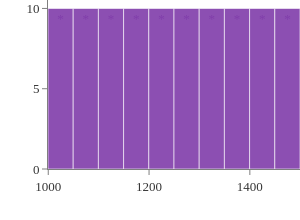
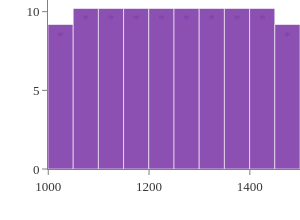

In [72]:
next(gen)

**Наблюдения:**  

- В таблице users 500 уникльных пользователей.


Values,500 (100%),,Max,75,,Avg,46.59,,53 (3%)
Missing,---,,95%,72.05,,Mode,---,,42 (3%)
Distinct,58 (12%),,75%,62,,Range,57,,63 (3%)
Duplicates,442 (88%),,Median,46,,iQR,30,,64 (3%)
Zeros,---,,25%,32,,std,16.67,,71 (3%)
Negative,---,,5%,21,,kurt,-1.20,,73 (2%)
RAM (Mb),<1 Mb,,Min,18,,skew,-0.00,,21 (2%)

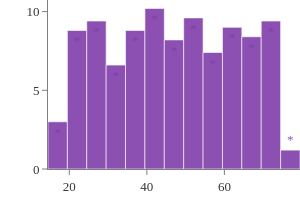
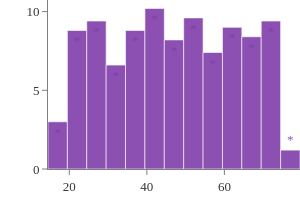

In [73]:
next(gen)

**Наблюдения:**  

- Пользователи имеют возраст от 18 до 75 лет
- В основном пользователи имеют возраст от 32 до 62 лет.


Values,500 (100%),,Max,1 499,,Avg,1 249.5,,1 000 <1%
Missing,---,,95%,1 474.05,,Mode,---,,1 329 <1%
Distinct,500 (100%),,75%,1 374.25,,Range,499,,1 342 <1%
Duplicates,---,,Median,1 249.5,,iQR,249.5,,1 341 <1%
Zeros,---,,25%,1 124.75,,std,144.48,,1 340 <1%
Negative,---,,5%,1 024.95,,kurt,-1.20,,1 339 <1%
RAM (Mb),<1 Mb,,Min,1 000,,skew,0.00,,1 338 <1%

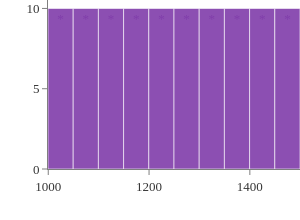
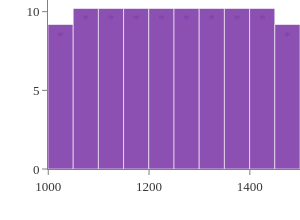

In [ ]:
next(gen)

**Наблюдения:**  

- В таблице users 500 уникльных пользователей.


Values,500 (100%),,Max,1 499,,Avg,1 249.5,,1 000 <1%
Missing,---,,95%,1 474.05,,Mode,---,,1 329 <1%
Distinct,500 (100%),,75%,1 374.25,,Range,499,,1 342 <1%
Duplicates,---,,Median,1 249.5,,iQR,249.5,,1 341 <1%
Zeros,---,,25%,1 124.75,,std,144.48,,1 340 <1%
Negative,---,,5%,1 024.95,,kurt,-1.20,,1 339 <1%
RAM (Mb),<1 Mb,,Min,1 000,,skew,0.00,,1 338 <1%

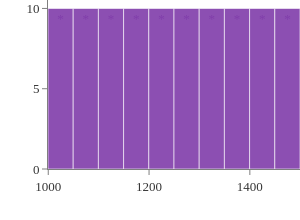
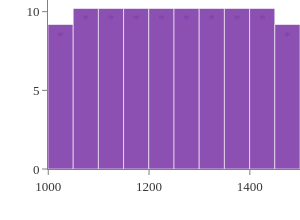

In [ ]:
next(gen)

**Наблюдения:**  

- В таблице users 500 уникльных пользователей.


Values,500 (100%),,Max,1 499,,Avg,1 249.5,,1 000 <1%
Missing,---,,95%,1 474.05,,Mode,---,,1 329 <1%
Distinct,500 (100%),,75%,1 374.25,,Range,499,,1 342 <1%
Duplicates,---,,Median,1 249.5,,iQR,249.5,,1 341 <1%
Zeros,---,,25%,1 124.75,,std,144.48,,1 340 <1%
Negative,---,,5%,1 024.95,,kurt,-1.20,,1 339 <1%
RAM (Mb),<1 Mb,,Min,1 000,,skew,0.00,,1 338 <1%

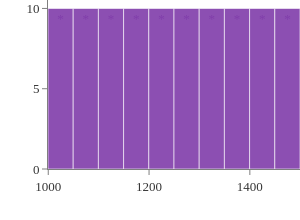
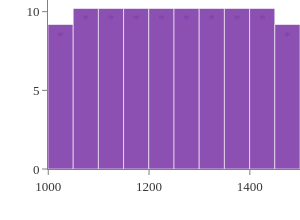

In [ ]:
next(gen)

**Наблюдения:**  

- В таблице users 500 уникльных пользователей.


##### Таблица calls (информация о звонках)

In [ ]:
df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv'
                       , parse_dates=['call_date'], date_format='%Y-%m-%d')
df_calls.sample(5, random_state=7)

,id,call_date,duration,user_id
73455,1185_249,2018-10-19,14.37,1185
12917,1033_168,2018-08-17,12.56,1033
74950,1186_772,2018-04-27,0.00,1186
189799,1467_66,2018-12-15,0.00,1467
165787,1409_412,2018-11-04,2.69,1409


Изучим каждый столбец отдельно.

In [ ]:
gen = pagri_data_tools.info_gen(df_calls)
next(gen)

Rows,Features,RAM (Mb),Duplicates,Dupl (sub - origin)
202 607,4,16,---,---


In [48]:
next(gen)

First date,2018-01-01 00:00:00,,Zeros,---,,Years missing,0%,
Last date,2018-12-31 00:00:00,,Missing,---,,Months missing,0%,
Values,202 607 (100%),,Distinct,365 (<1%),,Weeks missing,0%,
RAM (Mb),2,,Duplicates,202 242 (99.8%),,Days missing,0%,


**Наблюдения:**  

- Пропусков и нулевых значений нет.
- Присутствуют данные за каждый день. 


Values,202 607 (100%),,Max,38,,Avg,6.76,,0 (20%)
Missing,---,,95%,17.52,,Mode,0,,4.49 <1%
Distinct,2 871 (1%),,75%,10.7,,Range,38,,5.5 <1%
Duplicates,199 736 (99%),,Median,6,,iQR,9.4,,6.15 <1%
Zeros,39 613 (20%),,25%,1.3,,std,5.84,,6.38 <1%
Negative,---,,5%,0,,kurt,-0.11,,4.92 <1%
RAM (Mb),2,,Min,0,,skew,0.69,,5.05 <1%

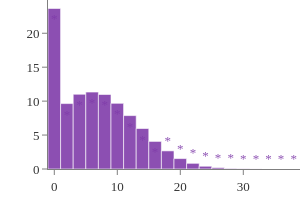
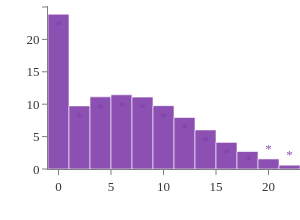

In [49]:
next(gen)

**Наблюдения:**  

- В колонке с длительностью звонка 20 процентов нулей.
- Максимальная длительность звонка 38 минут.
- Длительность звонка варьируется от 0 до 38 минут.
- В основном длительность звонка находится в диапазоне от 1.3 до 10.7 минут.
- Чаще всего звонок составляет 0 минут.

Values,202 607 (100%),,Max,1 499,,Avg,1 253.94,,1 377 <1%
Missing,---,,95%,1 472,,Mode,1 377,,1 168 <1%
Distinct,492 (<1%),,75%,1 379,,Range,499,,1 375 <1%
Duplicates,202 115 (99.8%),,Median,1 260,,iQR,253,,1 453 <1%
Zeros,---,,25%,1 126,,std,144.72,,1 196 <1%
Negative,---,,5%,1 027,,kurt,-1.24,,1 021 <1%
RAM (Mb),2,,Min,1 000,,skew,-0.05,,1 363 <1%

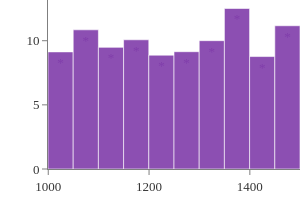
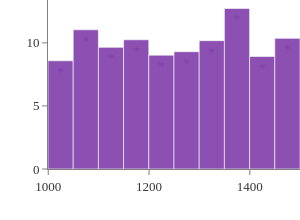

In [50]:
next(gen)

**Наблюдения:**  

- В таблице users 492 уникальных пользователя. 

Values,202 607 (100%),,1000_0 <1%
Missing,---,,1344_881 <1%
Distinct,202 607 (100%),,1344_883 <1%
Duplicated origin,---,,1344_884 <1%
Dupl (modify - origin),---,,1344_885 <1%
Empty,---,,1344_886 <1%
RAM (Mb),11,,1344_887 <1%

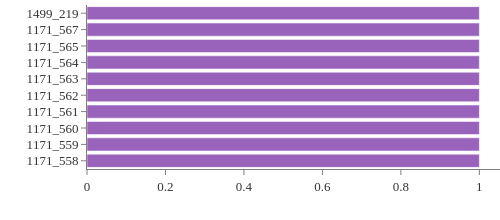

In [51]:
next(gen)

**Наблюдения:**  

- Все id звонков уникальны. Так и должно быть. 

##### Таблица messages (информация о сообщениях)

In [ ]:
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv', nrows=5)
df_users.sample(5, random_state=7)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
3,3,1000_3,550.27,2018-08-22,1000
2,2,1000_2,1197.26,2018-06-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
4,4,1000_4,302.56,2018-09-24,1000


Изучим каждый столбец отдельно.

In [ ]:
gen = pagri_data_tools.info_gen(df_users)
next(gen)

Rows,Features,RAM (Mb),Duplicates,Dupl (sub - origin)
202 607,4,16,---,---


In [ ]:
next(gen)

First date,2018-01-01 00:00:00,,Zeros,---,,Years missing,0%,
Last date,2018-12-31 00:00:00,,Missing,---,,Months missing,0%,
Values,202 607 (100%),,Distinct,365 (<1%),,Weeks missing,0%,
RAM (Mb),2,,Duplicates,202 242 (99.8%),,Days missing,0%,


> Для дальнейшего анализа срауз приведем колонку education к нижнему регистру и удалим лишние пробелы


Нужно проверить, что после нормализации категориальный тип остался прежний


In [ ]:
df.education = pagri_prep.normalize_string_series(df.education)
df.education.value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [ ]:
df.education.dtype

> сделать предположения, почему могло так произойти, выдвигаем гипотезы


> придумать способы проверки выдвинутых гипотез и записать


> если у нас по оси x время, то проанализировать сезонность


> подумать а так и должно было получиться, основываясь на понимании физики параметра


> зафиксировать возможные рекомендации


> Для гистограмм, нужно понять почему именно такое распределение метрики.  
> Совпадет это с логикой этой метрики.


> Также когда строим гистограммы и вайолин плот, то не просто фиксируем, что есть тяжелые хвосты, разброс между квартилями такой-то.  
> А думаем почему так, пытаемся связать это с физикой параметра. Должно быть физическое объяснение всех аномалий.  
> Если объяснения нет, то возможно это инсайт.


> Важно убедиться, что у нас есть данные на все источники, которые заявлены. Например, мы изучаем источники трафика и у нас они в разных таблицах.  
> Нужно убедиться, что во всех таблицах есть все источники, и проверить нет ли аномалий, возможно какой-то сильно выбивается или какого-то вообще где-то нет.


> И очень важно сверить, что периоды в разных таблицах (если у нас больше одной таблицы) совпадают.


> Важно проверить соответствуют ли временной период данных тому, который заявлен в задании,  
> определиться что будем делать с неполными периодами.


> Вообще, когда у нас несколько таблиц и там есть категориальные переменные или время, то  
> мы должны взять уникальные значения категориальных переменных из каждой таблицы (одниаковые переменные) и сравнить.  
> Количество уникальных должно совпадать, иначе нужно разбираться  
> И с верменем как минимум мин и макс даты должны совпадать до дня, а лушше до минуты часа


> Очень важно, если у нас есть стартовая дата чего-то и конечная, то обязательно нужно проверить,  
> нет ли у нас записей, где конечная дата меньше стартовой.


> Важная проверка, если у нас есть категории и даты, то сгруппировать по категориями и
> вывести количество занчений, минимальную и максимальную дату  
> Таким образом мы сразу поймем распределение в категории и  
> увидем какие временные интервалы у каждой категории  
> Если у нас все категории должны быть в один день, то мы поймем нет ли багов


> Вообще очень важно смотреть не только на аномалии в значениях, но и аномалии в категориальных переменных.  
> А тут аномалией будет отстутствие какого-то значения, хотя в описании или поставновке задачи оно есть.  
> Также совпадение количества значений категориальных переменных в разных таблицах.


> Внимательно посмотреть на столбцы, если есть столбцы, в которых могут быть потенциальные анамали, то проверить их.  
> Например, есть столбец возрасти стаж работы, проверить, что возраст больше стажа.  
> И подобные случаи.


> Проверка на нарушения уникальности  
> Убедить, что столбцы, значения в которых не должны повторяться и должны быть уникальными, такие в действительности.  
> Смотрим на результат функции `my_info`


> Проверка на ошибки целостности  
> Если у нас есть столбцы, в которых значения должны совпдаать попарно, то проверяем на это  
> `get_non_matching_rows`


In [ ]:
pagri_data_tools.get_non_matching_rows()

> Проверка условий  
> Проверьте, что данные в датафрейме удовлетворяют определенным условиям, таким как "возраст > 18" или "страна == 'Россия'"


#### Изучение дубликатов


ВАЖНО  
в временный файл записываем наблюдения по дубликатам, выбросам, нулевым, отрицательным значениям и пропусах,  
которые нужны для обработки. Чтобы потом не бегать по отчету.  
Записываем наблюдения, которые нужны для обработки, нарпимер, у нас есть записи с 0 комнат и мы их  
изучили в разрезе площади и увидели что все они скорее всего студии и однокомнатыне.  
Это нужно записать, чтобы в обработке заменить 0 на 1.  

Вообще основная задача этого этапа изучения данных не только обнаружить дубли, аномалии, пропуски,  
но и сформулировать гипотезы, которые помогут нам в обработке.   
Поэтому думаем не только что видим, а думаем сразу как будем обрабатывать и как можно проверить гипотезы.

В дальшейших разделах изучения данных схема такая 
- смотрим каждый столбец 
- изучаем его аномалии по категориям
- в процессе изучения по категориям стараемся определить закономерности, которые помогут обработать аномалии
- для каждого столбца думаем как можно обработать аномалии, какие другие столбцы могут помочь определить закономерности.  
- если определили числовой столбец, который может помочь, то сразу выдвигаем и проверяем гипотезу.  
- и все записываем во временный файл, чтобы потом обрабатывать столбцы

> Не забываем про ИИ.  
> Пишем список столбцов (именно что они значат, то есть образование, пол и прочее), говорим, что есть дубли.  
> И просим предложить причины этих дублей. Если видим важное, то используем для рекомендаций, выводов и замены дублей в предобработке.


> Проверяем на дубли

- Важно помнить, что если у нас есть id и название товара, то названия товара все равно нужно проверить на дубли,
  > возможно у нас 2 ай ди с одним названием.
- Также важно в каждой отдельной колонке проверить дубли и если их много, то посмотреть на соседние колонки, что там происходит
- Дубликаты часто носят скрытый характер.
  > То есть это могут быть поля, которые записаны по разному, но относятся к одному и тому же.  
  > Поэтому важно, если у нас категориальный признак, изучить нет ли повторящихся категорий, которые записаны немного по разному.  
  > Так как это создает шум, мы по сути имеем две разные категории, но на самом деле это одна. Нужно собрать их в одну.
- И очень важно, если мы не подтвердили, что это действительно дубликат (например у нас нет ай ди клиента и мы не смогли выяснить один и тот же ли это человек),
  > то нужно аккуратно удалять их. Но и оставлять много дублей плохо, так как они вносят шумы и искажения.
- Помним, что наличие дубликата не говорит точно, что это дубль, возможно у нас нет ещё колонок, котоыре бы детализировали и разделили эти дубли.
  > Поэтому тут могут быть рекомендации, чтобы добавли в фрейм доп колонки, которые помогут убрать дубли (либо сам ищешь ещё поля)


> Когда смотрим на дубли, то нужно ответить на вопрос так и должно быть, это нормально, что дубли в этих колонках.  
> Например у нас дубли во всех строках таблицы, нам нужно понять это может быть или этого не может быть, и нужно разбираться.  
> Аналогично когда смотрим колонки по 2, 3 и так далее, то самое главное, ответить на вопрос дубли могут быть в этих колонках.  
> Также когда разбиваем по категориям, задаем себе вопрос так могли распреедлеиться дубли.


> `check_duplicated`  
> `check_duplicated_combinations_gen`  
> В первую функцию можно передавать весь датафрейм и можно выбирать нужные столбцы для проверки на дубли и передавать их.


> Если мы нашли колонки в которых дубликатов не должно быть, то нужно изучить эти дубликаты по категориальным переменным в нашем датафрейме  
> `pagri_data_tools.analyze_anomaly_by_category`


In [ ]:
pagri_data_tools.analyze_anomaly_by_category(df, series_zeros, "by_category", "rooms", 'studio')

**Наблюдения:**

- Особых перекосов в сторону определенного значения в категории не наблюдается


> Идем по порядку с помощью next(gen)  
> если в выводе нет ничего интересного, то выше помещаем ячейку с таким содержимым
> %%capture  
> next(gen)  
> снова выполняем next(gen), если снова ничего интересного то, к ячейке выше добавляем next(gen) будет так  
> %%capture  
> next(gen);next(gen)  
> и так далее, пока не появится важная ячейка  
> далее оставляем эту важную ячейку и снова повторяем с первого пункта,  
> в итоге между ячейками с нужным выводом будут ячейки с запрещенным выводом и можно будет прогонять ноутбук весь целиком и выводы будут в нужнфх местах


> Посмотрим на дубли во всем датафрейме


In [ ]:
pagri_data_tools.check_duplicated(df)

> Посмотрим сколько у нас дублей в каждой колонке


In [ ]:
series_duplicated = pagri_data_tools.find_columns_with_duplicates(df)

> Думаем какие столбцы должны быть уникальными и где дублей не должно быть.  
> И их уже изучаем на дубли.


> Можно посмотреть на строки датафрейма в колонках с дублями  
> Это делаем, если есть время, так как этот шаг редко даст результат, так как на глаз сложно определить закономерности.  
> Суть этого шага посмотреть на строки датафрейма в разных колонках с дублями и выдвинуть гипотезы с закономеностями в этих дублях
> по очереди берем колонки и смотрим на датафреймы (записано рядом, чтобы показать, что не одну колонку только беерем)

In [ ]:
col1_duplicated = series_duplicated['col1']
col2_duplicated = series_duplicated['col2']

In [ ]:
col1_duplicated.head()
col2_duplicated.head()

Важно подумать не только о одиночных столбцах, которые долны иметь уникальные значения.  
Но обязательно подумать какие комбинации столбцов должны быть уникальными.  
Если есть такие комбинации, то фильтруем датафрейм по этим столбцам и используем


In [ ]:
filtered_df = df[['col1', 'col2']]
pagri_data_tools.check_duplicated(filtered_df)

> Если у нас есть столбцы в которых значения должны быть уникальными, то помещаем их в отдельный датафрейим и изучаем дальше.


> когда изучаем по категориям, то смотрим на diff_sum_pct, тут логика такая -  
нам нужно сравнить количество строк с пропусками в каждой категории, учитывая размер этой категории.  
То есть если у нас категории например дорогие квартиры и дешевые (категориальная переменная нарпимер категория стоимости)  
и в них соотношение пропусков 1000 к 500, а общее соотношение групп 700 на 800, то явно отличается количество.  
Поэтому мы смотрим на отличия, и если они существенны, то делаем вывод, что категория влияет на пропуски.  
Иначе пишем, что влияние не обнаружено.  

In [ ]:
gen = pagri_data_tools.check_duplicated_combinations_gen()

> смотрим по категориям

> ВАЖНО - убедиться, что нет в ноутбуке `_gen_` (делаем ctrl+F и вбиваем `_gen_`)  
ставим `_gen_` в том месте где хотим чтобы появились ячейки после работы в prep_dash  

Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

Код появится после работы в dash

In [ ]:
_gen_ 

ВАЖНО  
добавить в приложение dash возможность писать код на питоне для работы с текущим датафреймом.  
Это нужно чтобы изучить аномалии. То есть мы запускаем dash app.  
Далее у нас для каждой колонки будут выводиться разбивки по категориям  
Но дополнительно нужно будет проверять разные гипотезы, чтобы потом на основе этого обрабатывать данные.
Для этого нужно иметь возможность выполнять код и видеть результат.  
и чтобы можно было нужный код (который хотим поместить в отчет) сохранить также как next(gen)

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_duplicated, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

> Важно на дубли проверить и отдельные строки и целиком таблицу и подумать какие группы столбцов могут дать дубли и на это тоже проверить.


> Если в дублях у нас есть ай ди клиента, то тут понятно, если нет ай ди, то пишем рекомендацию, чтобы данные приходили с ай ди,  
> чтобы можно было понять это один человек или нет


> Если у нас id пользователя встречается не одни раз в таблице и есть другие поля которые должны быть всегда одни и те же,  
> напримем пол и прочее, то нужно проверить у всех ли пользователей все значения одинаковые в этом столбце.  
> Это может быть не только ай ди, любое уникальное поле, которое повторяется и для каждого этого поля есть другое  
> поле, которое не должно меняться, нужно проверять а действительно ли это поле не меняется.


#### Изучение пропусков


> Не забываем про ИИ.  
> Пишем название столбца (именно что они значат, то есть образование, пол и прочее), говорим, что есть пропуски.  
> И просим предложить причины этих пропусков. Если видим важное, то используем для рекомендаций, выводов и замены пропусков в предобработке.


> Проверяем на пропуски


> Когда смотрим на пропуски, то нужно ответить на вопрос так и должно быть, это нормально, что пропуски в этих колонках.  
> Когда смотрим на пропуски по категориям, то думаем есть ли закономерность, не случайно ли распределение по категориям


> Когда мы встречаем пропуски, прежде всего, нужно ответить на вопрос, существует ли закономерность в появлении пропусков.  
> Иными словами, не случайно ли их возникновение в наборе данных.  
> Случайно, значит нет закономерности с соседними столбцами, то есть пропуски есть для разных значений.  
> А могут быть неслучайные, то есть существует явная закономерностЬ, что пропуски есть только у сторок с общими занчениями в другом столбце.  
> Чтобы это проверить, нужно взять столбец с пропусками, отфильтровать только пропуски (взять их) и  
> посмотреть как эти пропуски распределены по другой переменной.


- Первое что нужно сделать, когда мы видим пропуск или выброс, это проверить является ли оно случайным.
  > То есть посмотреть не относятся ли все выбросы к одной категории. Если это так, то это уже не случайно и мы нашли аномалию, которую можно изучать.  
  > Если у нас случайны разброс пропусков в категориях, то значит тут есть случайность.  
  > Например, у нас возраст 0, и мы видим, что больше всего это у женщин. Следовательно получаем гипотезу, что женщины не хотят сообщать свой возраст.
- В пропусках мы можем определить какие категории, платформы и прочее не собираются данные. Смотрим пропуски, далее смотрим у каких категорий их больше,
  > и получаем вывод, что нужно обратить внимание на эти категории или системы, почему там пропуски


> `find_columns_with_missing_values`  
> `check_na_in_both_columns`  
> `analyze_by_category_gen`


In [ ]:
series_missed = pagri_prep.find_columns_with_missing_values(df)

days_employed,2174 (10.10%)
total_income,2174 (10.10%)


> Можно посмотреть на строки датафрейма в колонках с пропусками  
> Это делаем, если есть время, так как этот шаг редко даст результат, так как на глаз сложно определить закономерности.  
> Суть этого шага посмотреть на строки датафрейма в разных колонках с пропусками и выдвинуть гипотезы с закономеностями в этих пропусках
> по очереди берем колонки и смотрим на датафреймы (записано рядом, чтобы показать, что не одну колонку только беерем)


In [ ]:
col1_missed = series_missed['col1']
col2_missed = series_missed['col2']
col1_missed.head()
col2_missed.head()

> Думаем какие столбцы связаны, и их лучше изучить вместе на пропуски.  
> Смотрим на количество и процент пропусков в разных колонках и если они равны, то можно выдвинуть гипотезу, что пропуски совпадают
> То есть у нас может появиться гипотеза, что пропуски в нескольких столбцах связаны между собой.  
> Вот мы береме эти столбцы и смотрим сколько прпоусков в обеих колонках вместе, если это совпадает с пропусками в каждой колонке,  
> то гипотеза подтвердилась.


> Пример  
Можно заметить, что количество пропусков в колонке с количеством парков рядом и количеством прудов рядом совпадает.  
Выдвигаем гипотезу, что пропуски в одних и тех же строках в обоих столбцах.  

> Проверим эту гипотезу, для этого посмотрим сколько пропусков в обоих колонках вместе


In [ ]:
df_na_in_both_columns = pagri_data_tools.check_na_in_both_columns(df, ['parks_around3000', 'ponds_around3000'])
df_na_in_both_columns.sample(10)

Смотрим на строки не только всего датафрейма, но и только на выбранные строки.  

In [ ]:
series_missed['living_area'][['total_area', 'living_area', 'kitchen_area']].sample(10)

**Гипотеза подтвердилась**:
- Пропуски в одних и тех же строках в колонках с количеством парков рядом, количеством прудов рядом совпадает,  
растоянием до центра, растоянием до аэропорта примерно равны  

Посмотрим как распределены пропуски по категориям в строках, где прпоуски одновременно в этих столбцах.  

In [ ]:
gen = pagri_data_tools.analys_filtered_df_by_category(df, df_na_in_both_columns, 'df with na')

Если хотим показать только часть из gen, то подставляем нужные категории в эту функцию  


In [ ]:
pagri_data_tools.analyze_share_by_category(df, df_na_in_both_columns, 'df with na', 'is_apartment')

> Изучаем пропуски по категориям


> ВАЖНО - убедиться, что нет в ноутбуке `_gen_` (делаем ctrl+F и вбиваем `_gen_`)  
ставим `_gen_` в том месте где хотим чтобы появились ячейки после работы в prep_dash  

Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_missed, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

> когда изучаем по категориям, то смотрим на diff_sum_pct, тут логика такая -  
нам нужно сравнить количество строк с пропусками в каждой категории, учитывая размер этой категории.  
То есть если у нас категории например дорогие квартиры и дешевые (категориальная переменная нарпимер категория стоимости)  
и в них соотношение пропусков 1000 к 500, а общее соотношение групп 700 на 800, то явно отличается количество.  
Поэтому мы смотрим на отличия, и если они существенны, то делаем вывод, что категория влияет на пропуски.  
Иначе пишем, что влияние не обнаружено.  

> Смотрим на все поля  
> in_category_pct говорит о том сколько в этом значении категории изучаемых значений  
> in_column_pct говорит о том сколько процентов изучаемого значения данного значения категории в общем  
> total_count_pct помогает анализировать in_column_pct, так как мы видим сколько занимает это значение в общем


#### Изучение выбросов


ВАЖНО   
когда изучаем выбросы, нулевые и отрицательные значения, то нужно сразу проверять гипотезы.  
То есть если у нас нарпимер 0 команат, то мы выдвигаем гипотезу, что это студии и однокомнатыне и если у нас есть площадь или  
другой паарметр по которому мы можем проверить гипотезу, то проверяем.  
Также с другими параметрами.  
Именно тут в изучении данных мы должны выдвигать гипотезы и проверять их.  
И результаты писать в отчет и во верменный файл, чтобы потом в обработке данных использовать эти выводы гиптоез для замены пропусков.  

Не забываем изучать по категориям сильно низкие и сильно высокие знения.  
Например, если у нас цены на квартиры, то нужно посмотреть по категории населенный пункт.  
Так как мы сможем понять в этом населенном пункте могут быть такие занчения или нет.  
Аналогично и не с населенными пунктами.  
Наша задача - определить какая категориальная переменная характеризует переменную с выбросами.  
И посмотреть в ее разрезе, что поможет нам понять, что это за выбросы.

> Не забываем про ИИ.  
> Пишем название столбца (именно что они значат, то есть образование, пол и прочее), говорим, что есть выбросы.  
> Обязательно приводим значения выбросов, самые характерные, чтобы дать ИИ болше информации.
> И просим предложить причины этих выбросов. Если видим важное, то используем для рекомендаций, выводов и замены выбросов в предобработке.


> Когда смотрим на выбросы, то нужно ответить на вопрос так и должно быть, это нормально, что выбросы в этих колонках.


- Выбросы это не только просто сильно большое или сильно маленькое значение.
- Выбросы нужно также смотреть по мультипараметрам, с помощью моделей и искать аномалии.
- Выброс это то, что отделяется от других, что выбивается из общей картины. Следовательно это что-то особенное.
- Тажке выбросы говорят не только о плюсах, но и о минусах. Выбросы могут сказать, что у нас что-то сломалось.
  > Что-то не записывается, или работает с багами. Все это можно увдитеь по выбрасам и аномалиям.
- Обязательно посмотреть выбросы в разрезе категорий, так как мы сможем сделать выводы об их источнике.
- Если мы работаем со строгой отчетностью, то тут любой выброс это уже инсайт и нужно идти разбираться откуда это взялось.


> Если мы во время изучения данных выявили потенциальные выбросы, то нужно их отдельно изучить.  
> Для этого создаем датафрейм с нужными значениями и помещаем его в `Series`,  
> индекс это название колонки, в которой мы изучаем выброс.  
> Далее отдаем этот `Series` в функцию `analyze_by_category_gen`.


> Сначала изучим потенциальные выбросы, которые мы выявили при изучении колонок.  
> У нас в количестве детей есть значение 20.  
> Изучим его подробнее.


> Важно при изучении колонок записывать выбросы отдельно и потом коппировать сюда.  
> А тут нужно изучить эти значения отдельно.


> когда изучаем по категориям, то смотрим на diff_sum_pct, тут логика такая -  
нам нужно сравнить количество строк с пропусками в каждой категории, учитывая размер этой категории.  
То есть если у нас категории например дорогие квартиры и дешевые (категориальная переменная нарпимер категория стоимости)  
и в них соотношение пропусков 1000 к 500, а общее соотношение групп 700 на 800, то явно отличается количество.  
Поэтому мы смотрим на отличия, и если они существенны, то делаем вывод, что категория влияет на пропуски.  
Иначе пишем, что влияние не обнаружено.  

Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

> ВАЖНО - убедиться, что нет в ноутбуке `_gen_` (делаем ctrl+F и вбиваем `_gen_`)  
ставим `_gen_` в том месте где хотим чтобы появились ячейки после работы в prep_dash  

Если выбросов мало (меньше 10), то лучше просто показать датафрейм с этими выбросами и написать наблюдения.  

In [ ]:
series_outliers = pd.Series([df[df.children == 20]], index=['children'])

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_outliers, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

> Смотрим на выбросы используя Z-score  
> `detect_outliers_Zscore`


In [ ]:
series_outliers = pagri_data_tools.detect_outliers_Zscore()
# сначала смотрим на значения с большим количеством выбросов
series_outliers['col'].col.value_counts().to_frame('outliers')
# затем уже изучаем определенные датафреймы в series_outliers
series_outliers['col'].head()

Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_outliers, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

> Смотрим на выбросы используя квантили  
> `detect_outliers_quantile`


In [ ]:
series_outliers = pagri_data_tools.detect_outliers_quantile(df)

Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_outliers, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

> Посмотрим на строки датафрейма с выбросами


In [ ]:
col1_outliers = series_outliers['col1']
col2_outliers = series_outliers['col2']

In [ ]:
col1_outliers.head()
col2_outliers.head()

> Изучить выбросы по категориями  
> `analyze_by_category_gen`


> Смотрим на все поля  
> `in_category_pct` говорит о том сколько в этом значении категории изучаемых значений  
> `in_column_pct` говорит о том сколько процентов изучаемого значения данного значения категории в общем  
> `total_count_pct` помогает анализировать `in_column_pct`, так как мы видим сколько занимает это значение в общем


Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_outliers, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

Если переменная распределенна нормально, то выбросы можно определить как точки за пределами плюс минус 3 стандартных отклонения.  

Написать функцию для определения выбросов через 3 стандартных отклонения.

#### Изучение отрицательных значений


> Не забываем про ИИ.  
> Пишем название столбца (именно что они значат, то есть образование, пол и прочее), говорим, что есть отрицательные значения там где их быть не должно.  
> Обязательно приводим значения, самые характерные, чтобы дать ИИ болше информации.
> И просим предложить причины этих отрицательных значений. Если видим важное, то используем для рекомендаций, выводов и замены отрицательных значений в предобработке.


> Очень важно, если у нас есть столбец, в котором не должно быть отрицательных значений, то нам нужно отдельно изучить положительные и отрицательные значения.  
> И те и те посмотреть по категориям.  
> И на основе этого изучения мы моежм заметить причины отрицательных значений.  
> Например, в колонке стажа у нас очень много отрицательных значений и есть положительные значения.  
> Мы отдельно посмотрели отрицательные значения и они в основном принадлежат работающим людям.  
> А положительные пренадлежат пенсионерам.  
> Важно и полоительные и отрицательные значения посмотреть их макс и мин.  
> Вот мы для стажа посмотрели макси и мин и видим, что отрицательные значения похожи на реальные значения в годах.  
> А вот положительные слишком большие, и далее мы поняли, что это данные в часах.  
> В итоге у нас уже много предположений, которые помогут выяснить откуда появляются странные данные в этом столбце.  
> К тому же мы можем попробовать заменить отрицательные значения, если у нас есть уверенность на основе анализа.


> Изучаем отрицательные значения


In [ ]:
series_negative = pagri_data_tools.find_columns_with_negative_values(df)

> Определяем в каких колонках не должно быть орицательных значений.  
> Колонки в которых допустимы отрицательные значения удаляем из `series_negative`


> Изучим отрицательные значения в разрезе категорий


> Смотрим на все поля  
> in_category_pct говорит о том сколько в этом значении категории изучаемых значений  
> in_column_pct говорит о том сколько процентов изучаемого значения данного значения категории в общем  
> total_count_pct помогает анализировать in_column_pct, так как мы видим сколько занимает это значение в общем


> когда изучаем по категориям, то смотрим на diff_sum_pct, тут логика такая -  
нам нужно сравнить количество строк с пропусками в каждой категории, учитывая размер этой категории.  
То есть если у нас категории например дорогие квартиры и дешевые (категориальная переменная нарпимер категория стоимости)  
и в них соотношение пропусков 1000 к 500, а общее соотношение групп 700 на 800, то явно отличается количество.  
Поэтому мы смотрим на отличия, и если они существенны, то делаем вывод, что категория влияет на пропуски.  
Иначе пишем, что влияние не обнаружено.  

> ВАЖНО - убедиться, что нет в ноутбуке `_gen_` (делаем ctrl+F и вбиваем `_gen_`)  
ставим `_gen_` в том месте где хотим чтобы появились ячейки после работы в prep_dash  

Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_negative, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

#### Изучение нулевых значений


Помним, что важно выдвигать гипотезы и потом их проверять.   
Например так  
Выдвинем гипотезу, что 0 комнат у студий и однокомнатных.  
Проверим гипотезу по полощади.  

> Не забываем про ИИ.  
> Пишем название столбца (именно что они значат, то есть образование, пол и прочее), говорим, что есть нули там, гед их быть не должно.  
> И просим предложить причины этих нулей. Если видим важное, то используем для рекомендаций, выводов и замены нулей в предобработке.


> Изучаем нулевые значения


In [ ]:
series_zeros = pagri_data_tools.find_columns_with_zeros_values(df)

> Определяем в каких колонках не должно быть нулевых значений.  
> Колонки в которых допустимы нулевые значения удаляем из `series_negative`


In [ ]:
series_zeros = series_zeros.drop('children')
series_zeros = series_zeros.loc[['rooms', 'airports_nearest']]
series_zeros

dob_years           children  days_employed  dob_years educ...
dtype: object

> Изучим нулевые значения в разрезе категорий


> когда изучаем по категориям, то смотрим на diff_sum_pct, тут логика такая -  
нам нужно сравнить количество строк с пропусками в каждой категории, учитывая размер этой категории.  
То есть если у нас категории например дорогие квартиры и дешевые (категориальная переменная нарпимер категория стоимости)  
и в них соотношение пропусков 1000 к 500, а общее соотношение групп 700 на 800, то явно отличается количество.  
Поэтому мы смотрим на отличия, и если они существенны, то делаем вывод, что категория влияет на пропуски.  
Иначе пишем, что влияние не обнаружено.  

> Смотрим на все поля  
> in_category_pct говорит о том сколько в этом значении категории изучаемых значений  
> in_column_pct говорит о том сколько процентов изучаемого значения данного значения категории в общем  
> total_count_pct помогает анализировать in_column_pct, так как мы видим сколько занимает это значение в общем


> ВАЖНО - убедиться, что нет в ноутбуке `_gen_` (делаем ctrl+F и вбиваем `_gen_`)  
ставим `_gen_` в том месте где хотим чтобы появились ячейки после работы в prep_dash  

Строчку с созданием gen оставляем без is_dash, это для отчета,  
И ниже пишем строчку с is_dash для создания dash app и потом ее удаляем

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
gen = pagri_data_tools.analyze_by_category_gen(df, series_zeros, is_dash=True)
pagri_dash.prep_dash(gen, "/colab/pagri-projects/quarto/projects/housing-ads-investigation/housing_ads_investigation.ipynb")

> После изучения данных у нас могут возникнуть вопросы по определенным значениям, это возможно не выбросы,  
> мы просто хотим подробнее их изучить.  
> Для этого создаем датафрейм с нужными значениями и помещаем его в `Series`,  
> индекс это название колонки, в которой мы изучаем выброс.  
> Далее отдаем этот `Series` в функцию `analyze_by_category_gen`.  
> Нужно сделать специальную функцию для этого, чтобы не использовать `analyze_by_category_gen`


In [ ]:
check_series = pd.Series([df[df.col_for_check == value_for_check]], index=['col_for_check'])
gen = pagri_data_tools.analyze_by_category_gen(df, check_series)
next(gen)

> Также мы можем изучить любые столбцы (или часть столбцов) по категориям.  
> То есть мы изучаем как распределены элементы по категориям


In [ ]:
check_series = pd.Series([df[df.col_for_check == value_for_check]], index=['col_for_check'])
gen = pagri_data_tools.analyze_by_category_gen(df, check_series)
next(gen)

> Сделать функцию определения выбросов на основе машинного обучения


> Дополнительные моменты, которые стоит проверить и изучить

- Проверить на сложные выбросы, типа у нас есть статус и возраст и мы видим что студент имеет возраст 60 лет, это реально, но уже подозрительно.
  > Вот таких моментов может быть много, но нужно додуматься, чтобы найти такие комбинации, но это важно делать.
- важно проверить на корректность данные, то есть смотрим по отдельности каждый столбец и изучаем мин, макс, и другие параметры, и
  > думаем, это физически реально. И особенно, когда у нас несколько связаных параметров, нет ли между ними противоречия.  
  > Например, у нас есть дата показа рекламы и есть дата создания рекламы, естественно создание должно быть раньше, это нужно проверить.
- Проверяем данные ошибки
  > Ошибки которые не являются дублями, пропусками или выбросами.  
  > Это сложно сделать, хотя бы заметить явные ошибки
- Проверить на ошибки согласованности
  > Например, у нас пользователь с одним ай ди имеет разные имена.
  > `display(df.groupby('name')['age'].nunique())`
- вообще нужно придумать разные проверки для колонок, особенно связанных. И провести эту проверку.


### Промежуточный вывод


> Из наблюдений собираем важные выводы


Тут помещаем все наблюдения про диапазоны столбцов, основные диапазон и медианы с модами.  
Чтобы в конце скопировать отсюда и составить уже общий вывод.  

> Принимаем решение, как именно мы будем проводить обработку, почему именно так, \*зафиксировать рекомендации.  
> То есть отвечаем на вопрос, что будем делать с выбросами, что будем делать с null.  
> Будет идеально если тут зафиксировать рекомендации


**Промежуточный вывод**

>

- **children** Присутствует 47 отрицательных значений с "-1", а также аномалия в виде 20 детей ...
- **days_employed** Большая часть данных стобца со знаком "-". Однако, эти данные представляют из себя 84% всей выборки. ... будут заменены на .. исходя из определенного критерия, который будет описан далее.
  > - Причины пропущенных значений в столбцах **days_employed** и **income**:
  >   - Во-первых, это может быть из-за неправильной выгрузки данных. Оставим это предположение до того момента, пока не убедимся в неверности других предположений.**Наиболее вероятно**
  >   - Во-вторых, одной из гипотез было предположение об отсутствии трудового опыта у данной части выборки. Однако, если распределение по возрасту в данной группе равномерное по всем возрастам выборки. Также большая доля этой части выборки трудоустроена. **Гипотеза не подтверждена**
  >   - В-третьих, возможно, что эта часть выборки не имеет официального трудоустройства. Данная гипотеза вызывает сомнение в связи с тем, что при наличии достаточно большого стажа работы у представителей выборки у ее представителей нет официального трудового стажа. К тому же 18.9% данной выборки являются госслужащими. **Гипотез не подтверждена**
- **age** .. 0 возраст у 101 человека.
- **education & education_id** Необходимо будет привести данную категорийнуй переменную к общему виду. Избавиться от разного регистра. Но можно не тратить на это время и использовать следующий столбец **education_id**. Это позволит использовать меньше памяти и не повлияет на качество анализа.
- ...


## Предобработка данных


ВАЖНО  
помним, что когда мы удаляем записи  
`df = df[df.column > 0]`
то удаляются `na`  
поэтому нужно делать так  
`df = df[~(df.column <= 0)]`

Сразу записываем в файл что заменили и что удалили для промежуточного вывода.  

для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов - скорее всего, их нет.   
Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену.   
В этом случае правильно оставить эти значения пустыми. Отсутствие значения - тоже важный сигнал, который не нужно прятать;

> Важно, когда удаляем строки, то делаем сброс индекса


In [ ]:
.reset_index(drop=True)

> Не забываем про ИИ  
> Когда мы проводим предобработку данных, то первый вопрос мы себе задать следующий
> Какава вероятнсоть, что это является истиной? Если вероятнсоть ниже 60 прцоентов, то это делать не стоти и может лучше оставить как есть или не трогать этот столбец.  
> Например, у нас дубли или отрицательные значеия и мы выдвинули гипотезу, что это просто неправильный знак и хотим взять модель числа.  
> Но если мы подумаем, а высокая ли вероятность, что число просто с неверным знаком, то вероятнсот этого низкая.  
> Поэтому это делать не нужно.  
> Другое дело у нас датафрейме 1 прцоент полных дублей и при этом у нас есть достаточно точные колонки типа зарплаты с точностью до рублей или стаж в днях.  
> Вот тут мы можем с высокой вероятностью утверждать, что это дубли, так как мало вероятно что будет две записи настолько точно совпадать.  
> Поэтому сначала думаем насколько вероятна та гипотеза, которую мы выдвинули и хотим по ней изменить наши данные.  
> Тут лучше придерживаться правила не навреди.


> Когда удаляем значения из категориальных столбцов pandas, и в этом столбце нет больше таких занчений, которые удалил.  
> То нужно удалить это значение из категории


In [ ]:
df.drop(df[df.gender == 'XNA'].index, inplace=True)
df['gender'] = df['gender'].cat.remove_unused_categories()
df.value_counts(dropna=False)

In [ ]:
df.shape[0]

### Обрезание неполных временных периодов


> Если у нас датасет за год, например, и первый или последний месяц неполные, то их лучше выбрасить, если мы будем  
> расчитывать месячные метрики.  
> Но сначала конечно нужно проанализировать столбцы без обрезания, чтобы убедиться, что там нет ничего необычного.


### Выбор нужных столбцов для дальнейшего анализа


> Сохраним исходный датафрейм в переменную df_origin, чтобы была возможность вернуться к нему


In [ ]:
df_origin = df.copy()

> Удаляем ненужные столбцы


In [ ]:
df = df.drop(['col1', 'col2'], axis=1)
df.head(1)

- Думаем, какие колонки нам нужны, выбираем только их для дальнейшей работы.
  > Остальные убираем в другой датасет.
- Важно после изученя данных сначала убрать не нужные столбцы, а потом уже заниматься преобразованием (удалением пропусков и выбросов).
  > Думаем прежде чем удалять строки, так как возможно лучше удалить столбец и строки удалять будет не нужно.
- Пишем почему выбираем определенные столбцы


### Обработка выбросов


> Не забываем про нулевые значения и отрицательный.  
> В столбцах, где их быть не должно, они являются выбросами.


> С обработкай нулевых и отрицательных значений нужно быть внимательным.  
> Нужно сначала хорошо подумать, откуда могло это появиться,  
> тут поможет анализ этих значений в предыдущей главе.  
> Думаем откуад появилось отрицательное или нулевое занчение,  
> и если у нас есть гипотезы, которые похожи на правду (мы думаем что вероятность их истины больше 60%),  
> то мы обрабатываем их исходя из гипотезы.  
> Например, -1 часто бывает как отсутсвие чего-то, то есть мы в зависимости от контекста можем заменить его на 0.


> Важно каждый раз, когда мы удаляем что-то из датафрейма, то убедиться, что мы удалили столько строк, сколько и хотели.  
> Для этого выводим размер датафрейма до удаления.  
> Смотрим сколько строк мы хотим удалить.  
> Далее не сохраняя в датафрейм удаляем строки и смотрим верный ли итоговый размер.  
> Если все верно, то удаляем уже с сохранением.


> Не забываем, что выбросы мы также можем заменять на медианные значения.


> Посмотрим где у нас отрицательные значения


In [ ]:
pagri_data_tools.check_negative_value_in_df(df)

In [ ]:
df.shape[0]

21525

In [ ]:
df = df[df.children >= 0]
df.shape[0]

21478

> Посмотрим где у нас нулевые значения


In [ ]:
pagri_data_tools.check_zeros_value_in_df(df)

> Обрабатываем нулевые и отрицательные значения, затем снова проверяем


In [ ]:
pagri_data_tools.check_negative_value_in_df(df)

,negative


In [ ]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros


> Также нужно обработать выбросы, которые мы обнаружили при изучении данных.  
> Это могут быть любые колонки со значениями, которые не моут быть в реальности.


> Нужно сначала обработать выбросы, а потом уже обрабатываться пропуски.  
> Так как мы заоплняем пропуски, учитывая значения в колонке, которые возможно мы потом удалим.


- Помним про нулевые и отрицательные значения
- Нулевые значения, отрицательные значения являются выбросами, если они не могут быть у этой колонки.
- Очень важно понимать, когда выброс можно отбросить и он реально выброс и когда нельзя.
  > Опираемся на физику параметра, думаем это значение физически возможно.
- Также выброс может казаться выбрасом, но для бизнеса это не выброс.
  > Например у нас суммы покупок и одна покупка сильно выделяется, а там просто человек купил супе дорогой каньяк, например.
- Когда хотим обрезать выбросы, то думаем, какой порог может быть физически реальным и по нему режем, а не просто так берем какой-то перцентиль.
  > Всегда нужно думать с точки зрения физического возможного значения параметра и по нему резать (подумать а какое значение может быть максимально реальным и по нему обрезать)
- Если мы имеем дело со строгой отчестностью, то выбросы убирать нельзя, нужно разобраться откуда они.
- Если мы не можем с увереностью сказать, что это выброс, то нам не стоит его выкидывать, но работать как то нужно с ними,
  > тогда, логарифмируем (лучше использовать натуральный логарифм) эту колонку и работаем с такими значениями (тогда выбросы сожмуться).


> После удаления выбрасов, можно снова выполнить пункт про изучение выбрасов, так как выбросы могут появиться новые,  
> если у нас например выбросы были слишком нереальные значения, когда мы от них избавимся, будет лучше видно другое


### Обработка пропусков


Если мы не можем заполнить прпоуски в категориальной переменной, то даем им название.  

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna('не указано')

> Важно помнить, что пропус может быть вызван тем, что во измежании дублирования строк, при созаднии сводной таблицы,  
> занчения не повторяются, а если потом эту таблицу куда то отправить, то там эти пропуски могут стать null  
> Поэтому сначала смотрим последовательно на значения и думаем, не может ли это быть таким случаем.  
> Это могут быть даты, которые идут подряд и меду ними пропуски.  
> Или список названий четко по порядоку и между ними пропуски, это может быть вызвано как раз последствием создания сводной таблицы.  
> В пандас это видно, когда мы группируем строки, у нас в индексе дубли не пишуться, но пандас занчет, что там есть занчения,  
> но после импорта куда-то там могут не продублироваться значения и возникнут пропуски.


> Прежде чем обрабатывать пропуски, нужно подумать а можем ли мы их заменить исходя из имеющихся столбцов.  
> Например, у нас есть столбец с пропусками возраст, и есть стаж,  
> мы можем возраст заменить так стаж + 18 + 5  
> Аналогично другие ситуации нужно сообразить как можно заменить пропуски.  
> И только если нет идей, тогда уже заменяем на медиану, например, по группам.


In [ ]:
pagri_data_tools.check_missed_value_in_df(df)

> Если решии заменять прпоуски значениями, учитывая категории, то нужно убедиться, что размер этих категорий достаточный.


> Посмотрим размеры групп, если заменять внутри этих групп


In [ ]:
category_columns = ['education', 'family_status', 'gender', 'income_type']
value_column = 'total_income'
pagri_data_tools.check_group_count(df, category_columns, value_column)

> Заполним пропуски в группах от 10 элементов


In [ ]:
df[value_column] = pagri_data_tools.fill_na_with_function_by_categories(df, category_columns, value_column, func='median', minimal_group_size=10)

> Проверим сколько у нас осталось пропусков


In [ ]:
pagri_data_tools.check_missed_value_in_df(df)

> Если пропуски остались, то убираем какую-нибудь категорию и повторяем.


> что-то изменили - > посмотрели не изменилось ли количество дублей  
> `check_duplicated`


In [ ]:
pagri_data_tools.check_duplicated()

> Увидели пропуск - подумайте, нормально ли это. Сколько вообще пропусков может быть в этом столбце?  
> К примеру, в списке с электронными адресами пользователей, согласных на рассылку, будет много пропусков. Далеко не все предоставляют email.


> Можно использвоать такой подход

- если количество пропусков меньше 5 процентов, то удаляем (лучше меньше 1 процента)
- если количество пропусков от 5 до 20 процентов, то подбираем чем заменить, удалять не стоит
- если больше 20 процентов, то не трогаем, так как исказим


> Но оставляя пропуски, нам нужно помнить, что мы не можем по этим полям считать корреляцию с другими,  
> так как пропуски испортят расчет коэффициента корреляции. Аналогично другие метрики могут считаться некорректно.  
> Поэтому, если мы будем считать показатели по столбцу с пропусками, то их нужно либо убирать, либо этот столбец не использовать для расчетов.


> Для категориальных переменных оставлять пропуски нельзя, так как мы скорее всего будем группировать по ним и смотреть разные разрезы.  
> Поэтому в худшем случае, если не можем ничем заменить, и нет уверености, что пропуск можно заполнить пустой строкой (если значения физически нет),  
> то создаем категорию например `other` из пропусков.


> Если у нас пропуски в категориальной переменной и есть разные периоды или просто данные разбиты на части (то есть эта категориальная переменная повторяется),  
> то мы можем взять ещё какую-нибудь переменную, у которой нет пропусков, где пропуски у первой переменной и далее посмотреть другие периоды  
> Таким образом у нас будет предыдущий период, где будет занчение второй переменной и первой и если в нескольких периодах они одинаковые, то мы можем  
> заполнить и пропуски этим значением.  
> Ещё раз схема такая - берем 2 поля одно с пропусками, другое без, получаем новую таблицу, в этой таблице оставляем только униклаьные значения в поле без пропусков,  
> по этому полю будем джойнить. Далее в основнйо таблице дропаем описание и создаем новое описание из таблицы справочника.  
> `fill_missing_values_using_helper_column`


In [ ]:
pagri_data_tools.fill_missing_values_using_helper_column()

> Заполняем пропуски учитвая категории  
> `fill_na_with_function_by_categories`


> Важно следить, чтобы категории, по которым будем заполнять пропуски были обработаны.  
> Если у нас в категориальной переменной есть значение с большой буквы и с маленькой, то это одна категория,  
> но замена будет идити по двум, чтобы такого не было, нужно сначала обработать категориальную переменную.


> Также важно, чтобы в группах по которым мы будем считать значение для заополения было достаточно значений  
> для выбранной функции.  
> Например, если мы решили брать среднее, а в группе у нас 5 значений, то среди них может быть выброс и наше среднее будет некорректно.  
> Лучше в такой ситуации брать группу побольше для этих микрогрупп.  
> В идеале группы должны быть от 30 элементов.


> Можно посмотреть какой процент группах без значений


In [ ]:
temp = df.groupby(['education', 'family_status', 'gender', 'income_type'])['total_income'].sum()
(temp == 0).sum() * 100 / temp.size

In [ ]:
pagri_data_tools.fill_na_with_function_by_categories()

> Сделать функцию заполнения пропусков с помощью машинного обучения


> После удаления пропусков и выбросов желательно проверить какой прцоент строк мы удалили.


### Обработка дубликатов


> Все значения в колонках во всех таблицах нужно привести к нижнему регистру и по возможности к одному языку,  
> для перевода к одному языку можно использовать словарь, с помощью которого изменить неправильный язык  
> Это нужно, чтобы когда будем соединять таблицы, у нас условие соеденения правильно сравнивало равные значения.


> Можно посмотреть снвоа на дубликаты после обработки пропусков.


> `check_duplicated`  
> `find_columns_with_duplicates`  
> `check_duplicated_combinations_gen`  
> `get_duplicates_value_proportion_by_category`  
> В первую функцию можно передавать весь датафрейм и можно выбирать нужные столбцы для проверки на дубли и передавать их.


In [ ]:
pagri_data_tools.check_duplicated()

In [ ]:
pagri_data_tools.check_duplicated_value_in_df(df)

In [ ]:
pagri_data_tools.find_columns_with_duplicates()

> Заполним пропуски в группах от 10 элементов


In [ ]:
df[value_column] = pagri_data_tools.fill_na_with_function_by_categories(df, category_columns, value_column, func='median', minimal_group_size=10)

In [ ]:
pagri_data_tools.check_missed_value_in_df(df)

,missed
total_income,63 (0.3%)


> Если есть дубли, и мы считаем, что это не дубли, а просто разделились данные,  
> то объединеняем записи, которые имеют одинаковые значения ключевых признаков.  
> `merge_duplicates`


In [ ]:
pagri_data_tools.merge_duplicates()

> Если мы не уверены, что дубль является дублем и не хотим удалять, то можно использовать  
> маркировку дублей, можно добавить новую колонку, которая будет содержать информацию о том,  
> является ли строка дубликатом или нет.  
> `df['is_duplicate'] = df.duplicated()`


In [ ]:
df['is_duplicate'] = df.duplicated()

> Подумать, а можем ли мы обогатить данные, что разделит дубли.  
> То есть возможно в наших данных нет какого-то столбца, и тогда дубли уже не будут дублями.


> Если уверены, что это дубли, то удаляем их  
> `df.drop_duplicates()`


In [ ]:
df.drop_duplicates()

### Приведение данных к удобной форме


> Изменяем значения в столбцах на более удобные


In [ ]:
df.debt = df.debt.apply(lambda x: 'есть' if x == '1' else 'нет').astype('category')

In [ ]:
df.is_apartment.astype(str).map({'True': 'да', 'False': 'нет'}).astype('category')

> Если у нас в столбце, например, стаж данные в днях, то это нужно преобразовать в года.  
> Также если у нас в других столбцах данные в формате, который нужно изменить для лучшего анализа, то делаем это.


> Округлим значения в поле дохода до целого.  
> Целая часть выглядит реальной. А с дробной частью нужно разбираться почему стоько знаков.


In [ ]:
df.total_income = df.total_income.round().astype('int32')
df.head(1)

,children,age,education,family_status,gender,income_type,debt,total_income,purpose
0,1,42,высшее,женат / замужем,F,сотрудник,0,253876,покупка жилья


> Посмотрим сколько у нас людей с полом XNA осталось


In [ ]:
(df.gender == 'XNA').sum()

1

> Посмотрим кто это


In [ ]:
df[df.gender == 'XNA']

,children,age,education,family_status,gender,income_type,debt,total_income,purpose
10701,0,24,неоконченное высшее,гражданский брак,XNA,компаньон,0,203905,покупка недвижимости


> Всего 1 человек. И мы не можем идентифицировать его пол.  
> Удалим, чтобы не мешало анализировать графики.


In [ ]:
df.shape[0]

21402

In [ ]:
df.drop(df[df.gender == 'XNA'].index, inplace=True)
df['gender'] = df['gender'].cat.remove_unused_categories()
df.value_counts(dropna=False)

21401

In [ ]:
df.shape[0]

### Промежуточный вывод


> пишем как обработали данные, например


- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.
- Удалили отрицательные значения в колонке с количеством детей, которые составляли 0,2% от общего количества записей в данных.


## Обогащение данных и создание новых переменных

### Парсинг внешних источников

описываем процесс парсинга  
описываем источники и переменные

### Создание новых числовых переменных

Сразу пишем в файл какие новые переменные создали для промежуточного вывода.  

Числовые переменные создаем не только для дальнейшего их анализа.  
Создание числовой переменной может помочь создать новую категориальную переменную.  

Например есть у нас расстояние до центра в метрах.  
Мы создаем новую числовую переменную расстояние в км.  
Далее строим график зависимости расстояния и цены.  
И определеяем где цена резко меняется и получаем границу для создания новой категориальной переменной, в которой будет центр и остальное.  

Создадим переменную соотношение жилой и общей площади

In [ ]:
df['living_total_ratio'] = round(df['living_area'] / df['total_area'],2)

Values,21 796 (92%),,Max,1,,Avg,0.56,,0.56 (4%)
Missing,1 903 (8%),,95%,0.73,,Mode,0.56,,0.55 (4%)
Distinct,91 (<1%),,75%,0.64,,Range,0.98,,0.6 (4%)
Duplicates,23 607 (99.6%),,Median,0.57,,iQR,0.14,,0.62 (4%)
Zeros,---,,25%,0.5,,std,0.11,,0.58 (4%)
Negative,---,,5%,0.39,,kurt,0.23,,0.57 (4%)
RAM (Mb),<1 Mb,,Min,0.02,,skew,-0.14,,0.59 (4%)

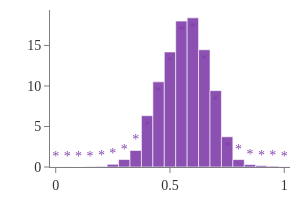

In [ ]:
pagri_data_tools.info_column(df, 'living_total_ratio')

### Категоризация данных


ВАЖНО  
следим, чтобы не осталось пропусков в категориальной переменной  
все пропуски нужно заменить на что-то типа - не указано

In [ ]:
df.columns.isna()sum()

Если есть пропуски, то добавляем 

In [ ]:
.fillna("не указано").astype('category')

Не забываем новые каеториальные переменные делать `.astype('category')`

In [ ]:
.astype('category')

ВАЖНО  
создали новую переменную, сразу же изучили ее использу `info_gen`  
задаем вопросы и пишем важные наблюдения  

In [ ]:
pagri_data_tools.info_column(df, 'price_segment')

Если мы при загрузке данных не смогли изменить типы данных из-за пропусков, то теперь меняем типы данных. 

У нас могут быть категориальные переменные не только для изучения данных на графиках под другим углом,  
но категориальные переменные можно использовать для изучения среза данных.  
Таким образом думаем какие срезы в датафрейме дадут нам важную информацию. И создаем категориальную переменную для них.  
Например, у нас в данных есть растояние до центра, мы можем создать новую категориальную переменную и поместить туда катгории растояния до центра.  
И затем изучить отдельные срезы в данных, например квартиры только в центре.  

Думаем какие категориальные переменные сделать для срезов.  

Могут быть операции разность, сумма отношение с другими переменными, которые дадут новую переменную.  
Смотрим на имеющиеся переменные и думаем какие из этих операций можно применить.  

> Важно, когда создали новые переменные, особенно числовые, то нужно их изучить через my_info (взять df только с нужными столбцами)  
Посмотреть на гистограммы и стат параметры.  

> Если у нас есть категориальная переменная, в которйо больше 3 значений, то нужно подумать а не можем ли мы из нее сделать  
> новую категориальную переменную с 2-3 значениями, но тут важно, чтобы это несло смысл. Тут нам может помочь ИИ. И сообразительнсоть. Часто сразу не заментны возможные категории, котоыре несут смысл.  
> Тут исходим из смысла, наша задача созадть перменную, которая добавит нашему исследованию новый смысл, даст как бы новый разрез, и это улучшит  
> качество наших выводов.  
> Например, у нас столбец семейный стату, и там 6-7 статусов, мы можем собрать их в 2 семейный статус и не семейный статус.  
> Тут отлично помогает ИИ. Пишешь ему название переменной, униальные значения в ней,  
> и просишь придумать возможную новую категориальнуюд переменную из 2-3 значений.


> Вообще при категоризации ИИ очень хорошо помогает, он может дать идеи возможных категорий на оснвое имеющихся значений.  
> Поэтому можно все столбцы прогонять через ИИ и смотреть что он предлагает, если есть то , что даст новый разрез нашим данным, то созадем категорийю.


> Важно, когда мы создаем категории, то всегда смотреть value_counts.  
> И делаем так, чтобы в каждой группе было достаточно элементов, хотя бы больше 30, а лучше больше 100.  
> Иначе выводы будут некоректные.  
> В идеале, чтобы количество элементов в каждой группе было от 1000. Лучше изменить диапазон и забрать часть данных от другой категории.


> Важно, когда создаем категориальную переменную, то даем ей тип `category`  
> Чтобы она появилась на графиках (так как идет фильтрация на числовые и категориальные)  
> и чтобы места меньше занимала


> Придумываем какие колонки можно дополнительно сделать из имеющихся.  
> Например у нас есть колонка длительность звонков, и 0 это пропущенный звонок,  
> мы можем сделать колонку is_missed, в которой будет true или false


> Стараемся сделать категориальную колонку с да нет для всех возможных колонок.  
> Например, у нас колонка количество детей и есть 0, 1, 2, 3, 4, 5 мы созадем колнку  
> есть дети или нет. 2 значения  
> Это очень полезно, так как мы можем посмотреть это на графиках и проверить гипотезы  
> стат тестами.


> Смотрим на колонки и думаем можно ли из нее сделать колонку с 2 значениями,  
> например есть и нет что-то


> Очень важно, когда мы создаем новые колонки, в которых используем несколько дургих, то нужно проверить распределение этой новой переменной, особенно выбросы.  
> Например, у нас начальная и конечная дата сессии и мы считаем длительность сессии. Вот тут нужно посмотреть какая минимальная длительность  
> и какая максимальная. Ну и естественно проверить есть ли длительность 0 и меньше нуля.  
> Таким образом мы можем найти инсайты уже после создания новых колонок, хотя в изначальных данных этих инсайдов не было видно.


> Обычная категоризация данных


> Категоризация помогает избежать проблемы с разреженными данными, когда у нас есть слишком много групп с небольшим количеством элементов.  
> Это может привести к некорректным выводам и ошибкам в анализе.
> Категоризация нужна, чтобы образовать группы, в которых достаточно значений для использования статистических методов.  
> И вообще, если в группе 1-10 элементов, например у нас возраст пользователей и 5 человек с возрастом 22, 3 человека с возрастом 23 и так далее.  
> Мы не можем разбивать по таким группам, так как их размер небльшой и выводы будут некорректные, поэтому нам нужно собрать их в группы,  
> чтобы у нас были группы с достаточным размером.


- Если у нас категориальная переменная имеет много значений, то мы не можем номрально с ней работать.
  > Так как мы не можем построить графики по ним, так как их много и они не числовые. Не можем сравнить их все.  
  > Поэтому нам нужно сократить категории.
- Нужно посмотреть на данные и подумать можем ли мы разделить их по сегментам рынка или по другим категориям, которые нам помогут.
- Мы можем категоризировать на основе и числовых и категориальных столбцов. То есть мы можем из категориальной переменной сделать
  > другую категориальную, уменьшив или увеличив разбиение.
- добавление категорий обогощает данные, при чем категории могут формироваться не из одной колонки, а из серии, то есть чтобы попасть
  > в определенную категорию значения столбцов должно быть такое то, а не только один столбец определяет категорию.
- категории могут быть да нет, то есть состоять из двух значений, например, у нас есть данные о рекламе и столбец где она показвалась,
  > и у нас много много разных устройств. Мы можем разбить на да нет, то есть показвалась реклама по телеку или нет


> Мы можем разбить данные на категории двумя способами

- разбивать на равные части
  > подходит, когда
  >
  > - диапазон значений является равномерным и имеет линейную структуру
  > - мы понимаем на какие интервалы хотим разбить данные
  > - мы хотим разделить диапазон значений на равные части для удобства анализа.
- разбить на основе квантилей
  > подходит, если
  >
  > - диапазон значений имеет неравномерную структуру
  > - мы не можем понять какие интервалы выбрать
  > - хотим выделить группы с конкретными характеристиками (например, группы с низким доходом, средним доходом и высоким доходом)


> Выбираем нужные способ и используем  
> `create_category_column`


> Чтобы посмотреть распределение по квантилям используем `pagri_data_tools.quantiles_columns()`


In [ ]:
df['floor_cat'] = df.apply(lambda x: 'первый' if x['floor'] == 1 else 'последний' if x['floor'] == x['floors_total'] else 'другой', axis=1).value_counts()

In [ ]:
pagri_data_tools.quantiles_columns()

In [ ]:
pagri_data_tools.create_category_column()

> Сделаем следующие группы

- до 30 лет
- от 30 до 40 лет
- от 40 до 50 лет
- от 50 до 60 лет
- старше 60 лет


In [ ]:
labels = ['до 30', '30-40', '40-50', '50-60', 'старше 60']
bins = [-np.inf, 30, 40, 50, 60, np.inf]

In [ ]:
df['age_cat'] = pagri_data_tools.create_category_column(df.age, labels=labels, bins=bins)
df['age_cat'].value_counts(dropna=False)

30-40        5704
40-50        5241
50-60        4520
до 30        3804
старше 60    2132
Name: age_cat, dtype: int64

Создаем новые переменные из времени

In [ ]:
weekday_dict = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}
month_dict = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

In [ ]:
df['publication_weekday'] = df['first_day_exposition'].dt.day_name().map(weekday_dict).astype('category')
df['publication_month'] = df['first_day_exposition'].dt.month.map(month_dict).astype('category')
df['publication_year'] = df['first_day_exposition'].dt.year.astype(str).astype('category')
# Задаем порядок для weekdays
weekday_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
df['publication_weekday'] = df['publication_weekday'].cat.reorder_categories(weekday_order, ordered=True)

# Задаем порядок для months
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
df['publication_month'] = df['publication_month'].cat.reorder_categories(month_order, ordered=True)


In [ ]:
df.columns.isna()sum()

Чтобы получить формат `янв'09`

In [ ]:
# Словарь для замены месяцев
months_translation = {
    'Jan': 'Янв',
    'Feb': 'Фев',
    'Mar': 'Мар',
    'Apr': 'Апр',
    'May': 'Май',
    'Jun': 'Июн',
    'Jul': 'Июл',
    'Aug': 'Авг',
    'Sep': 'Сен',
    'Oct': 'Окт',
    'Nov': 'Ноя',
    'Dec': 'Дек'
}
# Получаем отдельно месяц и год
months = df['first_day_exposition'].dt.strftime('%b').astype('category').cat.reorder_categories(list(months_translation.keys()), ordered=True)
years = df['first_day_exposition'].dt.strftime('%y')
months_years = pd.concat([months, years], axis=1)
months_years.columns = ['month', 'year']
# Создаем список уникальных (год, месяц) и сортируем
unique_months = months_years.drop_duplicates().sort_values(by=['year', 'month'])

# Создаем список для порядка
month_year_order = []

# Формируем month_year_order на основе уникальных (год, месяц)
for _, row in unique_months.iterrows():
    year = row['year']
    month = row['month']
    month_year_order.append(f"{months_translation[month]}'{str(year)[-2:]}")

# Заменяем месяцы и соединяем с годом
df['publication_month_year'] = months.astype(str).map(months_translation) + "'" + years
df['publication_month_year'] = df['publication_month_year'].astype('category')
df['publication_month_year'] = df['publication_month_year'].cat.reorder_categories(month_year_order, ordered=True)
df['publication_month_year']

In [ ]:
df.columns.isna()sum()

Для верменных переменных нужно делать не только отедльно месяц, год.  
Но и делать категориальную переменную обрезая время.  
То есть мы созадем переменную   
Янв'23

Но нужно подумать, нужна ли нам будет именно временная переменная, или достаточно категории,  
если будет нужна временная, то создаем обрезанную переменную datetime используя .dt.round()

> Категоризация с использованием лемматизации


> Если у нас есть столбец и мы хотим его лематизировать, то используем функцию  
> `lemmatize_column`


> Чтобы создать лемы для словаря категоризации, можно посмотреть имеющиеся предложения и использовать
>
> ```
> m = Mystem()
> m.lemmatize('образованием')
> ```


In [ ]:
m = Mystem()
m.lemmatize('образованием')

In [ ]:
pagri_data_tools.lemmatize_column()

In [ ]:
categorization_dict = {
    'недвижимость': ['жилье', 'недвижимость']
    , 'образование': ['образование']
    , 'автомобиль': ['автомобиль', 'машина']
    , 'свадьба': ['свадьба'] 
}

In [ ]:
df['purpose_new'] = pagri_data_tools.categorize_column_by_lemmatize(df.purpose, categorization_dict, use_cache=True)
df['purpose_new'].value_counts(dropna=False)

недвижимость    10779
автомобиль       4288
образование      3997
свадьба          2337
Name: purpose_new, dtype: int64

> Если нужно, уддалим старую колонку


In [ ]:
df = df.drop('purpose', axis=1).rename(columns={'purpose_new': 'purpose'})
df.head(1)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,dob_cat,total_income_cat
0,1,42,высшее,женат / замужем,F,сотрудник,0,253876,Недвижимость,40-50,200-500 тыс


> С помощью лематизации мы можем сократить количество категорий.


> Например мы можем выделить группы:

- операции с автомобилем (ключевое слово - автомобиль)
- операции с недвижимостью (ключевые слова: жилье, недвижимость)
- проведение свадьбы (ключевое слово: свадьба)
- получение образования (ключевое слово: образование)


> Используем функцию  
> `categorize_column_by_lemmatize`


In [ ]:
pagri_data_tools.categorize_column_by_lemmatize()

Из времени также можно сделать категориальный переменные, например, создать переменную для времени заправки, если больше 1 минуты, то долгая заправка, иначе короткая и так далее.


ВАЖНО подумать какие переменные мы можем создать не только категориальные, но и числовые и временные.  
Например, обрезание времени, чтобы получить дату по часам и прочее,


> Если мы хотим преобразовать категории в числа, то мы можем использовать

- lable encoding
  > Заменяем быквы числами. Хорошо работает, когда у нас порядковые категориальные переменные.  
  > Не забываем про порядок, если у нас алфавитный порядок наших категорий соотвествует числовому, то ок,  
  > если нет, то нам нужно самим определить порядок чисел, чтобы они соответствовали категориям в нужном порядке.
- one hot encoding
  > Если у нас категориальная переменная не упорядочиваемая, то лучше использовать one hot encoding, чтобы разница между числами не вносила шум,  
  > так как черный и белый и красный цвет закодированные 1, 2, 3 вносят смысл количества, но они не имеют этого свойства.
- target encoding
  > замена категориальной переменной на каую-то статистику по одной из категорий внутри этой переменной.  
  > Например у нас категориальная переменная это наличие задержки. Значение задержан / незадержан. Мы кодируем их как 0 и 1. Далее мы берем и считаем по каждой группе (для задержан и для незадержан)  
  > статистику, например, среднее и получаем столбец, где вместо каждой буквы будет ее среднее.  
  > Тут важно делать регуляризацию. Так как маленькие группы могут иметь сильно зашумленные статистики, так как если у нас  
  > группа из 5 значений, то среди них может быть легко экстремальное одно и оно сбивает статистику, поэтому добавляем штраф всем статистикам.  
  > Регуляризация это что-то похожее на сглаживание.  
  > Как это делается
  >
  > - берем считаем среднее по таргету (целевой переменной, то есть той, по которой мы счтаем статистику) всей таблице (то есть не делим на категории)
  > - Далее используем следующую формулу для сглаженного значения среднего по конкретной группе:  
  >   (среднее по группе _ количество элементов в группе + среднее по таргету без учета категорий _ размер регуляризирующей группы) / (количество элементов в категории + размер регуляризирующей группы)  
  >   Количество элементов в регуляризационнной группе выбирает эмперически. То есть это количество элементов, которым мы сглаживаем.  
  >   Смысл в том, что мы берем сколько-то элементов с занчением для всех категорий и сглаживаем им наши отдельные категории.
  > - Размер регуляризирующей группы обычно выбирают с помощью grid search, то есть берут цикл для размера этой группы и считают результат модели для каждого размера,  
  >   и потом выбирают тот размер, для которого результат лучше.
  >
  > `target_encoding_linear`  
  > `target_encoding_bayes`


In [ ]:
pagri_data_tools.target_encoding_linear()
pagri_data_tools.target_encoding_bayes()

> Использование кластеризации для категоризации


> Можно понизить размерность до 3  
> и построить 3 д график  
> По этому графику посмотреть есть ли у нас возможные кластеры  
> Если есть, то выделить их  
> Причем для понижения размерности можно брать все столбцы, а можно только часть.


### Расчет метрик


#### Метрики продукта


> тут будут расчеты продуктовых метрик


#### Экономические метрики


> тут будут расчеты экономических метрик


> Если расчет метрик является важным аспектом вашего исследования и требует подробного описания, то создание отдельной главы будет лучшим решением.  
> Если в этом разделе будет немного расчетов, то можно сделать расчеты метрик разделом предобработки данных


> Расчитываем разные метрики на основе имеющихся данных и тех, которыми смогли обогатить данные


> Важно следить за количеством недель в году, если мы создаем столбец месяца.  
> Проверять чтобы у нас не появлялась неделя дополнительная, из за того, что мы захватили предыдущий год


### Объединение данных


> Проверка соответствия:  
> Если у нас в разных таблицах есть значения, которые дожны быть одинакоые,  
> то нужно проверить, что значения в одном столбце соответствуют значениям в другом столбце.


In [ ]:
df['column_name1'].equals(df['column_name2'])

> Обоготить данные можно следующими способами

- взять поле нашей таблицы и найти дополнительные данные в интернете или ещё где-то и потом связать с нашей колонкой по этому полю
  > Самое просто это дата, если у нас есть дата, то мы можем много разной доп информации внести в наши данные связывая по дате.  
  > Также, например, у нас есть какие-то коды чего-то, мы ищем информацию по этим кодам и находим табличку с доп инфой по этим кодам и можем обоготить ими  
  > нашу таблицу. Например, у нас города или страны, мы можем по ним также внести доп инфу из какого-то источника, которая нам поможет.  
  > Вообще любое поле нашей таблицы это потенцильная нить для обогощения. Главное понять с чем полезным мы можем соеденить  
  > через конкретное поле, чтобы получить больше полезной информации для анализа, по сути для детализации наших зависимостей или для поиска  
  > новых зависимостей и инсайтов в них.  
  > Процесс следующий - мы берем каждую колонку нашего дата сета и думаем, с чем через нее мы можем связать и если придумываем, то идешь ищем эту информацию и  
  > в итоге соединяем.
- Можно пойти от обратного. Сначал подумтаь какие данные нам могут помочь и поискать их в интернете например, а потом уже думать как их соеденить с нашими
  > данными. Оба способа лучше делать одновременно.


> Каждый раз, когда мы работаем с дата сетом, мы должны понять что является сущностью этого дата сета.  
> Например событие, человек и прочее.  
> Далее нам нужно поянть а можем ли мы его идентифицировать по текущим данным (не всегда есть уникальный ай ди).  
> Если не можем, то нужно думта как обогатить данные, чтобы четко идентифицировать сущности


> Что нужно обязательно првоерить после соединения

- если мы соединяем по полю, которое уникально в обеих таблицах
  > - количество строк в левом датафрейме равно количеству строк в итоговом
  > - параметры каждого дата сета не изменились (если мы соединили правильно, то итоговые суммы по столбцам не должны измениться)
  >   - используем `df.sum(numeric_only=True)` для каждой таблицы до соединения и для общей таблицы и сравниваем значения
  >   - можно использвоать `df.describe` также до и после объединения и сравнивать параметры
- если у нас в одной из колонок для соединения не уникальные значения (то есть для одной строки в левой таблице будет несколько в итоговй)
  > - Сначала группируем таблицы, чтобы поле для соединения в обеих таблицах было уникальное
  >   и применяем предыдущий шаг с количеством строк в левой и итоговой и суммой значений в левой и итоговой одинаковой
  > - Если нам нужно соеденить без группировки (но это редко может быть, поэтому нужно подумать точно ли не моежм сгруппировать)  
  >   тогда нет выбора и остаются только следующие варианты  
  >    - если в левой таблице уникальные записи в колонке, по которйо соединяем  
  >    - тогда считаем сколько было записей в левой таблице в колонке для соединения и сравниваем с количеством **уникальных** записей в итоговой  
  >    они должны совпадать, но тут важно в итоговой брать уникальные записи - есил и в левой и правой нет уникальных - тут считаем сколько **уникальных** в левой до и сколько **уникальных** в итоговой, должно совпадать


> Если у нас что-то не сходится после соединения таблиц, то нужно внимально изучить это.  
> Тут может быть инсайт (кто-то не правильно вносит информацию, какие-то значения неверные или кто-то что-то хотел спрятать, не указать и прчоее).  
> Когда видим нестыковки после соединения таблиц, то должна загораться красная лампочка. Это потенциальный инсайт, баг, который мы можем найти и сообщить, чтобы его починили.


> помним, что метод соединения inner стоит по умолчанию в merge


> В колонках, по которым будем соеднить, проверяем, нет ли пропусков, пропуски нужно заменить нулями.  
> Иначе будет либо ошибка, либо пропуски сджойнятся с пропусками


> Проблема справочников  
> При объединение таблиц важно помнить про то, что в разных таблицах не только названия столбцов может быть разное,  
> но и одно значение может быть записано по разному в разных таблицах, например, названия профессий, названия городов,  
> имя в одной таблице на русском, а в другой на английском, номер телефона с черточкой или плюсом и без черточки или плюса.  
> Поэтому не забываем привести все значения таблиц к нижнему регистру, чтобы не было проблем разными регистрами для одного слова


> Проблема временных зон  
> В одной таблице может быть выгрузка по местному времени, а в другом по московскому


> Проблема курсов валют  
> Разыне системы могут брать курс за разные промежутки вермени, например, одна система берет курс в гугле (раз в час обновляется),  
> а другая система берет курс в ЦБ (обновляется раз в сутки)  
> И поэтому итоговые резултаты могут не состыковаться, поэтому, когда видим курсы валют, то нужно убедиться. что они взяты из одного испточника  
> и за один промежуток времени


> Когда мы работаем с данными, нам важно четко идентифицировать клиентов, событие или другую сущность, с которой мы работаем.  
> Иначе у нас будет шум, так как мы одного и того же клиента учтем более одного раза.


> Как можно обоготить данные, чтобы лучше идентифицировать сущности

- Добавить для клиента email, телефон, устройство, 4 цифры карты и другое, что может помочь его идентифицировать
  > Это важно так как у клиента могут быть разные телефоны, устройства, карты, но все это вместе поможет его идентифицировать точнее
- Добавить для события локацию, погоду, связанные событие, праздники, что поможет нам идентифицировать событие


### Промежуточный вывод


## Визуализация взаимосвязей переменных


### Исследование корреляционных связей

Следим за правильным порядком переменных полученных из времени

Чтобы подготовить title_for_axis, пишем ии так  

запомни - total_images = ['Число фотографий', 'числа фотографий', 0], - тут первый элемент списка это общая форма и с большой буквы, второй элемент это форма первого элемента при ответе на вопрос Чего и третий элеент списка это род элемента (0 - средний род, 1 - мужской род, 2 женский род) понятно?  

и далее даем список нужных названий колонок в таком виде 

Для корреляций достаточно просто указать название без рода и склонения

In [ ]:

titles_for_axis= dict(
        total_images = 'числа фотографий',
        last_price = 'цена',
        total_area = 'общая площадь',
        rooms = 'число комнат',
        ceiling_height = 'высота потолков',
        floors_total = 'всего этажей',
        living_area = 'жилая площадь',
        floor = 'этаж'
)

ВАЖНО  
проверить, что все категориальные переменные по прежнему имеют категориальный тип, чтобы при анализе они не поетрялись

In [ ]:
df.dtypes

>Топ n значений одного столбца по значениям в другом
>Сделать функцию, чтобы в столбцах, где бльше 20 уникльных значений посмотреть топ n значений по другой колонке.  
>Например, топ 10 покупателей по сумме покупок и прочее.  
>Идея в том, что если  в столбце до 20 уникальных значений, то мы проанализируем комбинации с другими стобцами на графиках.  
>А вот если у нас столбец не числовой и в нем больше 20 уникальных значений, то на графике мы не сможем понять топ n.

>Изучаем топ n значений в категориальных столбцах датафрейма, где значений больше порогового, по значению в столбце value_column.  
>Тут можно делать разные топы, использовать разные функции.  
>Задача изучить то, что мы не сможем изучить на графиках из-за болшого количества занчений в категориальной переменной,  
>поэтому мы берем топ n значений.  

In [ ]:
gen = pagri_data_tools.top_n_values_gen()
next(gen)

>Чтобы сравнить метрики между собой мы можем
- использовать корреляционный анализ (Пирсена, Спирмена, Кенделла)


>`heatmap_corr(df)`

( r = 1 ): Полная положительная линейная зависимость.  
( 0.7 < r < 1 ): Сильная положительная линейная зависимость.  
( 0.3 < r \leq 0.7 ): Умеренная положительная линейная зависимость.  

Если числовых переменных не много и они входят на один график, то просто строим график

In [ ]:
pagri_data_tools.pagri_data_tools.heatmap_corr(df)

Если переменных много и нужно разделить на части, то используем эту функцию 

In [ ]:
gen = pagri_data_tools.heatmap_corr_gen(df, part_size=10, titles_for_axis=titles_for_axis)
next(gen)

>Использование регрессии и случайного леса для определения влияния переменных  

>Коэффициенты регрессии позволяют оценить влияние каждой переменной на целевую переменную, учитывая влияние других переменных,  
>в то время как важные компоненты в случайном лесе позволяют оценить важность каждой переменной для предсказания целевой переменной.

>Используем регрессиию

>Чтобы построить регрессию и посмотреть стат значимость и коэффициенты удобно использовать модуль statsmodel

>VIF означает Variance Inflation Factor (Фактор инфляции дисперсии). Это статистическая метрика,   
>используемая для обнаружения мультиколлинеарности (сильной корреляции) между предикторами (фичами) в линейной регрессии.

>Обычно, VIF интерпретируется следующим образом:
>
- VIF < 5: слабая мультиколлинеарность
- 5 ≤ VIF < 10: умеренная мультиколлинеарность
- VIF ≥ 10: сильная мультиколлинеарность

>
>Смотрим R2 (коэффициент детерминации)
- использовать коэффициенты у регресси
>Мы строим регрессию и смотрим, у каких метрик больше коэффициенты. Таким образом мы поймем какие метрики сильнее зависят с целевой.  
>Важно, чтобы независимые переменные некоррелировали по отдельности и вместе (мультиколлиниарность).  
>По отдельности смотрим матрицу корреляции.  
>Чтобы определить коррелириуют ли вместе, береме независимые переменные,  
>и перебираем их выбирая одну из них целевой и смотрим R2.  
>Если R2 большой, то значит эта метрика (которая целевая на этом шаге) хорошо описывается другими и ее можно выбросить.
>Также не забываем поправки на гетероскедостичность (HC0, HC1, HC2, HC3) в статпакетах.  
>Нам нужно ответить на следующие вопросы
>    - Влияет ли метрика на целевую?
>    Оцениваем коэффициенты в уравнении регресси у каждой метрики.  
>    - Как влияет метрика на целевую?
>    Смотрим R2 (коэффициент детерминации). И определяем какая часть целевой переменной определяется независимыми метриками.  
>    - Коэффициенты при метриках в уравнении статистически значим? При какаом уровне значимости?
>    Смотрим в стат пакете p value для каждого коэффициента, что нам говорит значим ли этот коэффициент.  
>    То есть мы не просто смотрим его абсолютное значение, а учитываем p value.   
>    - Дайте содержательную интерпретацию коэффицентам?
>    При увеличении метрики k на 1, целевая метрика увеличивается на $b_{k} * 1$
>    То есть нужно перевести коэффициенты в реальное сравнение, насколько увелчисться целевая метрика при изменении определенной метрики на 1
>    - Найдите 95 процентный доверительный интервал.
>    В стат пакете смотрим значение и оно говорит, что если мы многократно повторим ноши вычисления с новыми данными, то 95 процентов наших  
>    полученных коэффицентов будут лежать в этом диапазоне.  

>Строим модель и изучаем результат  
>`linear_regression_with_vif`

In [ ]:
pagri_data_tools.linear_regression_with_vif()

>Испльзовать коэффициенты у классификацию    
>Строим случайный лес какие метрики сильнее всего влияют на решения модели.   
>`plot_feature_importances_classifier`   
>`plot_feature_importances_regression`

>Тут нужно подумать как использовать категориальные переменные тоже   
>Нужно их перевести в one hot encoding или подобное, чтобы также проверить силу их влияния на целевую перменную

In [ ]:
titles_for_axis = dict(
    debt = 'долга'
    , children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'
)
title = 'График важности признаков для предсказания цены'
pagri_data_tools.plot_feature_importances_classifier(df, target='debt', titles_for_axis=titles_for_axis, title=title)
pagri_data_tools.plot_feature_importances_regression()

>На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез

> используем быблиотеку `shap`, чтобы определить метрики, которые лучше других помогают предсказывать целевую перемменную

Добавить в dash app возможность сохранять код для ячейки с фильтром (срезом данных).  
То есть у нас есть фильтр, мы хотим посмотреть срез данных и фильтруем данные.  
И если увидели что-то важное, то мы сохраняем код для создания графика с этими x, y, category и фильтром.  
То есть в коде сначала будет фильтрация датафрейма и потом создание графика в 2 строки.  

важно мы не пишем все наблюдения, а только те, которые могут быть важны для анализа, то есть мы смотрим, задаем вопросы данным и   
и если ответ важен, то мы записываем наблюдения)

ВАЖНО   
Когда мы видим таблицу или график, то мы придумываем вопросы к результату.  
Все возможные вопросы (как, почему, зачем, сколько, как долго, быстро ли, медленно ли, важно ли это, из-за чего это и прочие вопрсоы)
И отвечая на эти вопросы мы получаем наблюдения и выводы
И чтобы задавать правильные вопросы, мы должны сначала подумать о физике параметров, которые мы видим.

Если у нас много значений в переменной, то мы агрегируем данные и можем построить бары.  
Но если мы агрегируем данные по переменной, в которой много значений и нам это нужно.  
То мы не сможем построить бары, и тогда мы строим гистограмму. То есть мы берем, например, для каждой заправки считаем среднее время заправки и так как у нас много заправок,  
но мы хотим визуализировать среднее время по ним, и не агрегировать по другому параметру, то мы можем испльзовать гистограмму.  
В данном случае гистограмма своего рода агрегация в бины, то есть мы получаем как бы новую переменную из бинов, в каждом бине будет агрегированы данные.  
Это работает, когда нам нужно просто посмотреть колечество, так как в бинах будет количество. Таким образом мы получаем сколько у нас заправок имеют определенное среднее вермя заправки.


> Про размер графиков  
> Стандартный размер графиков width=600, height=400  
> Для более сложных графиков, когда требуется больше места для отображения данных, можно использовать размеры width=800, height=600 или width=1000, height=800


> Сравнивать количество элементов нужно в абсолютных и относительных величинах.  
> Когда мы сравниваем только в абсолютных величинах, мы не учитываем размеры групп.  
> В одной группе может быть элементов больше чем в другой и тогда сравнение будет не совсем точным.  
> Если у нас 2 категориальные переменные, то мы можем сравнивать отностельные величины  
> по одной переменной, а можем по другой.  
> Это как сравнивать суммарный возраст в группах, это не дает полной картины и мы сравниваем средний возраст,  
> чтобы размер группы не влиял.


> ВАЖНО
> Анализ графиков и выводы для них должны полностью перекрывать постановку задачи и цель.  
> Это значит, что если цель проанализировать зависимость наличия долга, то мы в идеале должны проанализировать  
> влиянеие каждой переменной на наличие долга (числовой и категориальной)  
> Кончено нужно проанализировать все возможные зависимости.  
> Но все зависимости с переменной в постновке задачи мы обязаны проверить и дать выводы. И о наличии и об отсутствие.  
> Важные выводы делаем не только о наличие интересных моментов, но и об отсутствие.


> Сначала раздел графиков  
> На основе графиков формируются гипотезы (например, у нас у мужчин зп больше)
> И после раздела графиков идет раздел проверки гипотез. Тут мы првоеряем разные гипотезы новые и те, что увидели на графиках.  
> Это правильная последовательность сначала изучили графики и потом на основе их сформировали гипоетзы
> Перед разделом про графики идет раздел с корреляцией и поиском главных компонет случайного леса.  
> Мы выбиарем переменную, для которой мы далее хотим посмотреть разыне зависимости и указываем ее целевой для сучайного леса  
> И смотрим какие фичи сильнее влияют.  
> И теперь можем построить графики с целевой перменно и этими главными фичами и в выводе можно указать про то что это важные компоненты случаного леса


> На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез


### Изучение зависимостей между числовыми переменными


> Изучаем scatter plots


In [ ]:
titles_for_axis = dict(
    # numeric column
    children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'    
)

In [ ]:
pairs = {('total_images', 'last_price'): None, ('total_images', 'floors_total'): {'total_images': [-2.15, 22.45], 'floors_total': [0.51, 28.54]}, ('total_images', 'kitchen_area'): {'total_images': [-1.04, 28.44], 'kitchen_area': [-0.6, 59.26]}, ('total_images', 'parks_nearest'): {'total_images': [np.int64(0), np.int64(50)], 'parks_nearest': [np.float64(1.0), np.float64(3190.0)]}, ('total_images', 'ponds_around3000'): {'total_images': [np.int64(0), np.int64(50)], 'ponds_around3000': [np.float64(0.0), np.float64(3.0)]}, ('total_images', 'living_total_ratio'): {'total_images': [np.int64(0), np.int64(50)], 'living_total_ratio': [np.float64(0.02), np.float64(1.0)]}, ('total_images', 'kitchen_total_ratio'): {'total_images': [np.int64(0), np.int64(50)], 'kitchen_total_ratio': [np.float64(0.03), np.float64(0.79)]}, ('total_images', 'price_per_sqm'): {'total_images': [np.int64(0), np.int64(50)], 'price_per_sqm': [np.int64(7962), np.int64(1907500)]}, ('last_price', 'living_area'): {'last_price': [np.int64(430000), np.int64(763000000)], 'living_area': [np.float64(2.0), np.float64(427.55)]}}
pagri_data_tools.pairplot_pairs(df, pairs, coloring=True, horizontal_spacing=0.12, rows=3, cols=3).show(config=dict(displayModeBar=False, dpi=200), renderer="png")
# если нужно интерактивый график, то
pagri_data_tools.pairplot_pairs(df, pairs, coloring=True, horizontal_spacing=0.12, rows=3, cols=3)

Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
pagri_dash.scatterplot_analysis_dash(df, "path/to/notebook/for/save")

### Изучение зависимостей между категориальными переменными


> Чтобы автоматически генерировались подписи осей и заголовок графика для категориальных, временных и числовых с категориальными зависимостейь
> , нужно заполшнить такой словарь.  
> Первый элемент списка - это подпись оси  
> Второй элемент списка - это как это название будет отображаться в заголовке графика  
> Для числовых столбцов также указывается род, чтобы правильно выбрать (Середнее, средний, средняя) (0 - средний род, 1 - мужской род, 2 - женский род)


In [ ]:
f'Среднее / Медианное / Суммарное {numeric} в зависимости от {category} и {category}'  

In [ ]:
titles_for_axis = dict(
    # numeric column (0 - средний род, 1 - мужской род, 2 - женский род) (Середнее образовние, средний доход, средняя температура) )
    children = ['Количество детей', 'количество детей', 0]
    , age = ['Возраст, лет', 'возраст', 1]
    , total_income = ['Ежемесячный доход', 'ежемесячный доход', 1]    
     # category column
    , education = ['Уровень образования', 'уровня образования']
    , family_status = ['Семейное положение', 'семейного положения']
    , gender = ['Пол', 'пола']
    , income_type = ['Тип занятости', 'типа занятости']
    , debt = ['Задолженность (1 - имеется, 0 - нет)', 'задолженности']
    , purpose = ['Цель получения кредита', 'цели получения кредита']
    , dob_cat = ['Возрастная категория, лет', 'возрастной категории']
    , total_income_cat = ['Категория дохода', 'категории дохода']
)

Важно когда мы смотрем очередной график, то задавать не только вопросы к данным, но и думать как можно отфильтровать  
данные, чтобы сделать дополнительные полезные выводы.  
То есть мы фильтруем данные и потом эти графики поместим в раздел с анализом срезов.  

Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
pagri_dash.category_analysis_dash(df, "path/to/notebook/for/save")

> Строим матрицу тепловой карты для категориальных переменных и изучаем зависимости  


Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/home/pagri/git_repos/pagri_private_modules')
import pagri_dash
pagri_dash.categorical_heatmap_matrix_dash(df, "/home/pagri/git_repos/pagri-projects/quarto/projects/housing-ads-investigation/temp.ipynb")

> Посмотрим на распределение количества элементов между группами


> Нужно подумать как отобразить не только процент от всего количества, но и пороцент в группе  
> То есть у нас есть значение в ячейке, сумма всех, сумма по категории на оси x и сумма по категории на оси Y  
> Вот нужно как-то отобразить процент от суммы, процент от одной категории и от другой категории


In [ ]:
12 (0.5% of total, 20% of row, 15% of col) 

> Можно сделать кнопки, чтобы можно было подсветку делать внури колонок и строк


> Можно сделать кнопки (процент от общего) (процент от тут указывается название оси x) (аналогично для второй оси)


In [ ]:
pagri_data_tools.categorical_graph_analys_gen()

> Строим treemap  
> `treemap`  
> `treemap_dash`
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.treemap()

In [ ]:
app = pagri_data_tools.treemap_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

> Строим parallel_categories  
> `parallel_categories `  
> `parallel_categories_dash `
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.parallel_categories()

In [ ]:
app = pagri_data_tools.parallel_categories_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

> Строим Sankey  
> `sankey `  
> `sankey_dash`
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.sankey()

In [ ]:
app = pagri_data_tools.sankey_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

### Анализ временных зависимостей


Когда мы хотим изучить верменную зависимость, то нам нуно создать новые переменные с обрезанными (trunc or round) значениям, чтобы можно было сгруппировать используя groupby or pivot_table  
по этой обрезанной переменной и применить функцию агрегации и построить график, например, среднее время заправки на азс по часам.  
Вот когда мы работаем с временем, нам нужно думать какие переменные создать, обрезая текущее время.


> Строим когортный анализ, если есть возможность


> Если у нас есть даты, то мы можем посмотреть не просто абсолютные значения на каждую дату какой-то метрики,  
> а посмотреть относительные значения относительно предыдущего значения.  
> Для этого нужно составить таблицу, в которой будет изменение в процентах относительно предыдущего значения.  
> И затем визуализировать для каждой даты динамику этого показателя


### Изучение зависимостей между числовыми и категориальными переменными


добавить слайдер как доп переменную и анимация будет сразу

In [ ]:
df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000], width=900, height=500)
fig.show()

Важно когда мы смотрем очередной график, то задавать не только вопросы к данным, но и думать как можно отфильтровать  
данные, чтобы сделать дополнительные полезные выводы.  
То есть мы фильтруем данные и потом эти графики поместим в раздел с анализом срезов.  

> Можно добавить кнопку среднее и количество  
> Чтобы можно было посмотртеть распределение по количеству, когда смотрить среднее.


In [ ]:
_gen_ 

Добавить в hover количество элементов в группе,  
чтобы понимать размер группы.

Добавить возможность перескакивать комбинации.  
Если много колонок, то комбинаций очень много и часть может быть просто не нужна для анализа.  

Изучаем следующим образом  
- смотрим на график и определяем есть ли взаимодейсвие (то есть отличаются ли значения в разных группах, это будет видно как разная высота баров)
- если разницы в барах нет, или она минимальная, то сразу можно пропускать
- если разница есть, то думаем важна ли для нас ээта комбинация столбцов
- если нет, то пропускаем
- если да, то пишем наблюдения и сохраняем

Не забываем смотреть 1_cat чтобы изучить отдельную категорию.  
То есть график появлился, смотрим на обе категории и на числовую переменную и думаем, нужно ли нам по отдельности изучить  
каждую категориальную переменную c числовой. Если уже изучили, то не изучаем.
Нужно подумать как сохранять уже изученые комбинации, чтобы не повторяться (может в dash app добавить всплывающее окно, для графиков, для которых уже был вывод, что уже было)

Нужно сделать в dash app чтобы было 4 графика 
- каждая категория с числвой (2 графика)
- и по 2 категории вместе с числовой для разной последовательности категорий (то есть сначала одна легенда, потом другая)  
Так будет удобно и в браузере есть место для 4 графиков.

In [ ]:
import sys
sys.path.append('/home/pagri/git_repos/pagri_private_modules')
import pagri_dash
pagri_dash.numeric_category_analysis_dash(df, "/home/pagri/git_repos/pagri-projects/quarto/projects/housing-ads-investigation/temp.ipynb")

### Анализ срезов данных 

Срезы нужно обязательно сравнить со всем датафреймом.  
То есть мы например, изучили центр города и нужно сделать выводы основываясь на сравнении центра и всего города.

Нужно создать 2 генератора и параллельно идти, чтобы сначала выводился срез, а потом уже целый датафрейм.  
Тут наша задача не изучать выбросы, дубли и прочее.  
Тут задача найти отличия среза от всего датафрейма.

Возможно лучше прйти все колонки так попарно, а потом выбрать только те, которые имеют отличия.  
И построить только их.

Срезы нужны не только чтобы изучить отдельно часть данных, важно сравнивать срез со всем датафреймом.  
Нужно подумать какие срезы будет полезно сравнить со всем датафреймом.  
И провести сравнительный анализ. И поместить в отчет то, что имеет отличия и важно для выводов.

сделать приложение dash чтобы можно было выбирать колонки для анализа,  
чтобы можно было фильтровать по всем категориальным переменным,  
чтобы были слайдеры для фильтрации по числовым переменным,
чтобы можно было выбирать типы графиков и строить разные графики.  
Это не генератор, а это для ad-hoc анализа.   
То есть мы подумали что интересно будет изучить этот срез и эти переменные и изучили.  
А потом можно подумать как это автоматиировать, чтобы в цикле строились нужные графики.  

Анализ срезов состоит из анализа срезов из одного значения, то есть мы выбираем конкретное значени и по  нему фильтруем.  
и анализа срезов из нескольких переменных, когда мы выбираем несколько значений для среза или даже несколько переменных и в них выбираем определенные значения.  

Анализ срезов по одному значению мы просто фильтруем по нему и смотрим результат функции `info_gen` или 'info_column'  

А анализ срезво по нескольким значениям или переменным будет результатом анализа графиков в dash app.  
То есть мы в процессе анализа фильтруем данные и после работы в dahs app мы фильтрованные графики помещаюем в этот раздел.  
Чтобы разделить срезы и полный анализ.  

Нужно подумать как лучше изучать срезы.  
В данном разделе лучше изучить срезы отдельных значений, то есть отдельный город, отдельный пол и прочее.  
То есть мы фильтруем по одному значению и его изучаем в функцией `info`  
А изучение срезов данных, которые состоят из набора значений (например изучить цену в топ 10 городах), это уже будет сделано  
в анализе графиков.  

Тут мы изучаем подготовленный набор данных в разрезе разных категориальных переменных.  
Задача посмотреть на отдельные срезы и найти закономерности в данных.  

Например у нас есть данные о продажах квартир, мы создали новые категориальные перменные, обогатили данные  
И теперь хотим посмотреть какое распределение цены только в центре, или какая площадь квартир возле парков и прочее.  
То есть мы тут изучаем отдельно переменные в разрезе категорий, то есть строим срезы.  
ВАжно, что тут мы изучаем отедльные переменные, срезы в зависимостях переменных будем строить в разаделе визуализации. 

Определить цель. Прежде чем начинать анализ срезов, важно четко определить, какие вопросы вы хотите ответить или какие гипотезы хотите проверить. Это может включать:
- Сравнение различных групп (например, по возрасту, полу, региону).
- Изучение влияния определенных факторов на целевую переменную.
- Выявление аномалий или неожиданных паттернов в данных.

Выбор переменных для срезов. Выберите переменные, по которым вы хотите сделать срезы. Это могут быть как категориальные, так и количественные переменные. Примеры:
- Категориальные переменные: пол, категория товара, регион, уровень образования.
- Количественные переменные: возраст, доход, количество покупок (то есть мы можем просто взять срез с зарплатой до 100 тысяч и прочее, не обязательно иметь категорию для создания срезов, причем у нас может быть категория доходов, но срез мы можем взять в другом диапазоне).

Важно когда мы выбрали параметры по которым хотим сделать срез, то далее нужно выбрать условие по которому мы будем создавать срез.  
Срез это фильтрация или группировка, то есть должна быть либо функция аггрегации или значения по которым мы будем фильтровть.  
Например мы для среза выбрали параметр города. Теперь нам нужно отобрать города для среза.  
Мы выбираем параметр количество объявлений (все зависит от цели, можно было выбрать и количество населения, значение других параметров, все что поможет нам создать топ)
И далее по нему фильтруем или аггрегируем.  

Срезы данных можно создавать различными способами. Вот несколько подходов:
- Фильтрация данных: Используйте условия для выбора подмножеств данных.  
Например, выберите только тех клиентов, которые находятся в определенном регионе или имеют доход выше определенного порога.  
- Группировка данных: Используйте функции группировки (например, groupby в pandas для Python) для агрегирования данных по выбранным переменным.   
Это позволяет вам получить сводные статистики по группам.
- Кросс-табуляция: Для категориальных переменных создайте кросс-таблицы, чтобы увидеть взаимосвязи между переменными.

Анализ срезов. После создания срезов данных проведите анализ:
- Статистический анализ: Рассчитайте основные статистики (среднее, медиана, стандартное отклонение) для каждой группы или среза. Это поможет вам понять, как различаются группы по ключевым показателям.
- Визуализация: Постройте графики для визуального представления данных. Это могут быть:  
Гистограммы для распределения количественных переменных.  
Столбчатые графики для сравнения категориальных переменных.  
Ящики с усами (boxplots) для визуализации разброса и выявления аномалий.  
- Сравнительный анализ: Сравните срезы между собой. Например, как различается средний доход мужчин и женщин или как меняется поведение клиентов в зависимости от региона.

Если мы для среза выбрали одно значение (например конкретный город), то мы просто посмотреть результат функции`info` и проанализировать его  
Но если мы выбрали для среза набор значений, то нам нужно уже построить графики для сравнения стат параметров или других аггреигующих параметров  
для каждого занчения в срезе. То есть нам нужно выбрать параметры по которым мы будем сравнивать значения в срезе.  

Фильруем датасет по определенному значению и далее либо изучаем по отедльным столбцам, либо по всем испоьзуя генератор

То есть мы изучаем срез по одному значению

Созадем 2 генератора (или больше, если хотим сравнить несколько срезов), для среза и всего датафрейма и идем изучаем их вместе.  

Нужно сделать отдельный генератор, чтобы в нем не было информации про пропуски, нули и прочее,   
И организовать так, чтобы было удобно сравнивать.  
Также гистограммы нужно сделать на одном графике, чтобы накладывлись друг на друга и сделать прозрачность.    
Это очень удобно и если гистограммы будут накладываться друг на друга, то можно будет увидеть сразу отличия средних и мод на графике.    
В идеале сделать, чтобы были не столбцы, а типа каги, то есть линия со ступеньками, так удобнее сравнивать гистограммы. 

ОЧЕНЬ ВАЖНО  
- в наблюдения пишем обязательно диапазон значений столбца.  
Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. 
- пишем медианное занчение и по гистограмме и по квантилям определяем оснвоной диапазон.  
В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м  
Это все нужно, чтобы потом сформулировать вот такой вывод (в оснвоном выводе отчета), то есть мы для разных столбцов пишем диапазоны,  
основной дипазаон, медианы, моды, а потом уже собираем это в 1 или несколько выводов,  
Например.  
Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-50 кв.м. Размер площади кухни-от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,6-2,7 м., но встречаются редкие варианты до 19 комнат и высотой потолка до 20 кв.м. (либо ошибка, либо свободная планировка с возможностью многоуровневости).


В итоге мы сраним диапазоны, моды, медианы в срезе и во всем датафйреме.  


Было бы идеально определить отличия в срезе и в общей картине, не просто сухими цифрами,  
а собрать все наблюдения вместе и расписать это в подобном виде-   
Рынок недвижимости центральной части города представлен несколько более широким по площади диапазоном : основная масса- это жилье от 30 до 150 кв.м с пиком в сегменте 45-80 кв.м. При этом жилая площадь занимает большую долю, чем среднестатистическая квартира: в центре СПб большое количество домов старой застройки, в которой пространство "сдвинуто" в пользу жилой площади. Особенностью этой части города является то, что большинство квартир, предлагаемых на продажу,- 2-3 комнатные: здесь в общей массе достаточно низкая доля 1-комнатного жилья и выше доля 4-комнатных квартир. Наибольшее количество предложений в абсолютном выражении (цена за объект) приходится на диапазон 5-15 млн.руб. с пиком 5-8 млн.руб.(маленькие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 35 млн.руб. Стоимость квадратного метра недвижимости в основном варьируется от 70 до 150 тыс.руб. с пиком в 100 тыс.руб. Наряду с типовыми предложениями на продажу выставлено жилье со стоимостью 1 кв.м. до 266 тыс.руб за кв.м. В целом цены жилья центра города выше по цене, чем аналогичное в других районах.

In [ ]:
df_sliced = df[df.location_zone == 'Центр']
gen_slice = pagri_data_tools.info_gen(df_sliced)
gen = pagri_data_tools.info_gen(df)

In [ ]:
next(gen_slice)
next(gen)

Если есть что-то важное и есть отличия, по которым можно сделать выводы, то строим отдельно в отчет

In [ ]:
print('Центр города')
pagri_data_tools.info_column(df_sliced, 'last_price')
print('Весь датафрейм')
pagri_data_tools.info_column(df, 'last_price')

**Наблюдения:**  
- пишем тут наблюдения

ВАЖНО  
Сравниваем не только отдельные столбцы с общей картиной.  
Нужно взять срез и посмотреть на корреляцию, зависимости между числовыми, категориальными и т.д.  
Как это делали для всего датафрейма, только в укороченной версии, то есть можно взять общей картины, что мы нашли интересного  
(то есть взять названия столбцов) и посмотреть на эти же графики, но уже в срезах.  
Если есть время, то можно и полностью прогнать все необходимые срезы по всем столбцам как для всего датафрейма.  

Полезно изучить топ определенного столбца.  
То есть нам нужно выбрать параметр по которому мы отберем топ значений для категорий.  
Затем выбрать параметр для которого мы будем считать топ значений (числовая переменная)
И построить топ.  
Например, топ цен квартир в 10 городах с максимальным количеством объявлений.  


In [ ]:
selected_cities = df.groupby('locality_name').size().rename('count').sort_values(ascending=False).to_frame().head(10)
selected_cities

In [ ]:
selected_cities = selected_cities.index

In [ ]:
config = dict(
    df = df[df.locality_name.isin(selected_cities)]
    , x = 'locality_name'
    , x_axis_label = 'Название населённого пункта'
    , y = 'price_per_sqm'
    , y_axis_label = 'Цена квадратного метра'
    , title = 'Цена кв метра в зависимости от населенного пункта'
    , func = 'mean'
    , width = None
    , height = None
    , orientation = 'v'
)
pagri_data_tools.bar(config)

### Когортный анализ


> Не забывать про когортный анализ. Если у нас есть параметр, по которому мы можем наши данные разбить на когорты, то  
> нужно разложить на когорты и посмотреть динамику по когортам.  
> Когорты это например, пользователи пришедшие в одни день или месяц.  
> Если мы объеденим пользователей в когорты и посмотрим динамику какого-то параметра по месяцам например, то увидим как изменяется.  
> Тут также нужно помнить, что если значение например за 3 месяц больше значения за 4 месяц, то это ничего не значит само по себе.  
> Так как мы имеем дело с выборкой, то нам нужно проверить статистически значимая это разница.  
> Тут нам понядобятся стат тесты.


### Промежуточный вывод


ВАЖНО  
подумать для каждого раздела в визуализации (временные, числовые, категориальные и числовые с категориальными)  
какие закономерности не проверил.  
убедиться, что все зависимости, которые были в задании изучили.  
Это самый важный моменты, тут лучше остановится и тщательно подумать,  
так как могут быть изучены не все зависимости.

ВАЖНО   
Убедиться, что сетки по осям стоят где нужно, часто для вертикальных или горизонатльных графиков лишняя сетка вдоль баров

## Формулирование и провера гипотез


### Формулирование гипотез


ВАЖНО  
это редко бывает, но нужно об этом помнить  
Когда мы хотим проверить какую-то гипотезу на основе среднего или другой статистики, то нужно подумать нет ли сильного разделения на группы  
по какой-нибудь категориальной переменной.  
Если у нас есть такое разделение, то нужно использовать стратифицированную выборку.  
То есть мы должны взять выборку из каждой группы пропорционально её размеру.  
Считаем коэффициенты каждой группы (ее размер делим на количество всей выборки) и умнажаем их на количество нужных элементов.  
То есть мы из каждой страты возьмем прпорциональное количество элементов.  
Нарпимер, мы хотим сравнить средние значения дохода в двух компаниях.  
И берем по 100 сотрудников из каждой. Без стратификации у нас редкие сотрудники могут не попасть.  
Поэтому мы берем категориальную переменную (например должность) и делим выборку на группы. И из каждой берем пропорциональное количество элементов.

Смотрим выводы и из них формулируем гипотезы.  

И далее думаем какие гипотезы можно ещё проверить, которых у нас нет в выводах.  

> На основе проведенного анализа данных сформулирем следующие гипотезы:


> Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок.  
> Гипотеза 2: У мужчин средний доход выше  
> Гипотеза 3: Цель получения кредита не зависит от среднего ежемесяченого доход  
> Гипотеза 4: Средний доход по семейному статусу одинаковый, но у вдовцов отличается  
> Гипотеза 5: У должников в среднем больше детей  
> Гипотеза 6: У должников средний возраст ниже  
> Гипотеза 7: Медианный доход у должников и не должников не отличается


> Не забываем что гипотезы можно проверять и между 2 категориальными переменными.  
> Проверять есть ли между ними зависимости.  
> Также если мы на графиках определили, что есть между 2 категориальными перменными связь, то тут можем это проверить


### Проверка гипотез


ВАЖНО  
принято в выводе писать положительный результат  
то есть пишем что гипотеза подтвердилась и указваем какая гипотеза.  
То если мы опровергли нулевую гипотезу, то пишем альтернативную гипотезу и пишем что она подтвердилась.  
Если у нас нет оснований отвергнуть нулевую гипотезу, то пишем нулевую гипотезу и пишем что нет оснований ее отвергнуть.  
То есть если мы отвергаем, то формулируем вывод как положительный, чтобы не было путаницы, а если нет оснований, то так и пишем.  

> Проверим сформулированные гипотезы.


> **Гипотеза 1: Название гипотезы**


> H0: The two categorical variables are independent.  
> H1: The two categorical variables are not independent (i.e., there is a significant association between them).


Далее нужно определить какой тест нам нужен

Если у нас 2 категориальные переменные, то тут просто

Если у нас категориальная и числовая, то сначала смотрим на распределение числовой переменной.  
Если сразу решаем использовать не параметрику, то манна уитни или крускал -уоллис.  
Если параметрика, то нужно проверить на равенство дисперсий в группах.  
И далее если равны, то т тест / тест вэлча или anova / anova вэлча.  
Если использовали anova, welch anova, kruskal, то если есть отличия, то используем тест тьюки, чтобы определить какие группы отличаются.

> Примеры гипотез

- Есть ли зависимость между наличием детей и возвратом кредита в срок?


> Это будет часто возникать когда у нас категориальная целевая переменная и другие категориальные переменные.  
> И мы хотим проверить влияют ли категориальные переменные на целевую.  
> Например у нас есть поле наличие долга (есть или нет)  
> Вот тут мы можем провести тесты со всеми каетгориями на наличие зависимости с наличием долга.  
> В идеале мы на графиках должны найти гипотезы и тут их проверить.  
> Но если у нас целевая переменная, то мы можем сравнить ее со всеми категориями


In [ ]:
pagri_data_tools.chi2_pearson()

> Формируем словарь для подписей осей и названия гистограм


In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количества детей']
    , age = ['Возраст', 'возраста']
    , total_income = ['Ежемесячный доход', 'ежемесячного дохода']    
)

> Нулевая гипотеза должна быть направлена на отсутствие эффекта, а альтернативная гипотеза должна быть направлена на наличие эффекта.


> Формулируем гипотезу через H0, H1


> H0: У мужчин средний доход не выше, чем у женщин  
> H1: У мужчин средний доход выше, чем у женщин


> Смотрим распределение метрики


In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

> Делаем вывод о распределении.  
> Выбираем критерий для проверки гипотезы.  
> Определяем уровнь значимости.


> Проводим тест  
> ВАЖНО  
> df в ttest_ind_df и подобных можно испльзовать только для 2 стороннего случая  
> Для одностороннего нужно придумать как определять какая группа первая по порядку пойдет в тест,  
> в зависимости от постановки гипотезы, так как альтернатива опредляется исходя из порядка аргументов в функции теста


> Если используем ттест или анову, то сначала проводим тест на проверку дисперсии


> H0: У должников и не должников дисперсия не отличается  
> H1: У должников и не должников дисперсия отличается


In [ ]:
pagri_data_tools.levene_df
pagri_data_tools.levene
pagri_data_tools.bartlett_df
pagri_data_tools.bartlett

> Выбираем критерий


In [ ]:
pagri_data_tools.chi2_pearson
pagri_data_tools.ttest_ind_df
pagri_data_tools.ttest_ind
pagri_data_tools.mannwhitneyu_df
pagri_data_tools.mannwhitneyu
pagri_data_tools.proportion_ztest_1sample
pagri_data_tools.proportions_ztest_2sample
pagri_data_tools.proportions_ztest_column_2sample
pagri_data_tools.proportions_chi2
pagri_data_tools.proportions_chi2_column
pagri_data_tools.anova_oneway_df
pagri_data_tools.anova_oneway
pagri_data_tools.tukey_hsd_df
pagri_data_tools.anova_oneway_welch_df
pagri_data_tools.kruskal_df
pagri_data_tools.kruskal
pagri_data_tools.bootstrap_diff_2sample # важно, сохраняем fig и в следующей ячейке делаем fig.shwo(), иначе на google colab работает некорректно

> Проводим тест


> Если отклоняем гипотезу, то строим доверитлеьный интервал


In [ ]:
pagri_data_tools.confint_t_2samples
pagri_data_tools.confint_t_2samples_df
pagri_data_tools.confint_proportion_ztest_2sample
pagri_data_tools.confint_proportion_ztest_column_2sample
pagri_data_tools.confint_proportion_2sample_statsmodels
pagri_data_tools.confint_proportion_coluns_2sample_statsmodels

In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количества детей']
    , age = ['Возраст', 'возраста']
    , total_income = ['Ежемесячный доход', 'ежемесячного дохода']    
)

Примеры для разных критериев

2 категориальные переменные или 1 категориальная переменная и мы хотим сравнить количество в каждой группе.

**Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок**


> H0: Наличие детей не влияет на возврат кредита в срок.  
> H1: Наличие детей влияет на возврат кредита в срок.


> Так как у нас обе переменных категориальные, то воспользуемся критерием хи-квадрат Пирсона.  
> Уровень значимости alpha выберем 0.05


In [ ]:
pagri_data_tools.chi2_pearson(df.has_child, df.debt)

Хи-квадрат Пирсона
alpha =  0.05
p-value =  1.724356890544321e-05
Отклоняем нулевую гипотезу, поскольку p-value меньше уровня значимости


**Результат:**  

На уровне значимости 0.05 нулевая гипотеза о том, что наличие детей не влияет на возврат кредита в срок, была отклонена. Это свидетельствует о том, что существует статистически значимое влияние наличия детей на возврат кредита в срок.


Если мы хотим проверить отличается ли количество в одной категориальной переменной, то используем chisquare

Он проверяет, насколько наблюдаемое распределение категориальной переменной отличается от ожидаемого равномерного распределения.  

**Гипотеза 1: Нет зависимости между количеством публикаций и днем недели.**  

H0: День недели не влияет на количество объявлений  
H1: День недели влияет на количество объявлений

In [ ]:
daily_counts = df['publication_weekday'].value_counts().sort_index()
daily_counts

publication_weekday
Понедельник    3591
Вторник        4157
Среда          3940
Четверг        4270
Пятница        3970
Суббота        1918
Воскресенье    1681
Name: count, dtype: int64

In [ ]:
pagri_data_tools.chisquare(daily_counts)

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что день недели не влияет на количество объявлений, была отклонена. Это указывает на то, что существует статистически значимое влияние дня недели на количество объявлений.

Категориальная с 2 значениями и числовая переменная  (т тест или тест манна уитни)

**Гипотеза 2: У мужчин средний доход выше**  

H0: У мужчин средний доход не выше, чем у женщин   
H1: У мужчин средний доход выше, чем у женщин

посмотрим на распределение

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  
тест манна уитни

Используем критерий Манна-Уитни  
Альтернатива будет - больше  
Уровень значимости alpha выберем 0.05  

In [ ]:
male = df[df.gender=='M']['total_income']
female = df[df.gender=='F']['total_income']

In [ ]:
my_module.mannwhitneyu(male, female, alternative='l')

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что у мужчин средний доход не выше, чем у женщин, была отклонена. Это указывает на то, что доход мужчин статистически значимо выше, чем у женщин.

Если мы решили использовать т тест


Проверим гипотезу, что дисперсии в группах не отличаются

H0: У должников и не должников дисперсия не отличается  
H1: У должников и не должников дисперсия отличается

Используем тест Левена


In [ ]:
yes = df[df.debt=='есть']['age']
no = df[df.debt=='нет']['age']

In [ ]:
my_module.levene([yes, no])

Так как дисперсия в группах разная, будем использовать тест Уэлча.  
Уровень значимости alpha выберем 0.05

In [ ]:
my_module.ttest_ind(yes, no, equal_var=False, alternative='s')

Построим доверительный интервал

In [ ]:
my_module.confint_t_2samples(yes, no, equal_var=False, alternative='s')

категориальная переменная, у которой больше 2 значений и числовая. 

Предположения ANOVA:
- Данные должны быть нормально распределены.
- Дисперсии в группах должны быть равны (гомоскедастичность).
- Наблюдения должны быть независимыми.

Если хоть одно из этого не выполняется, то лучше использовать kruskal

**Гипотеза 4: Средний доход по семейному статусу одинаковый, но у вдовцов отличается**  

H0: Средний ежемесячный доход не различается между группами по семейному статусу  
H1: Средний ежемесячный доход различается между группами по семейному статусу  


Используем критерий Краскела-Уоллиса  
Уровень значимости alpha выберем 0.05


In [ ]:
pagri_data_tools.kruskal_df(df[['family_status', 'total_income']])

Используем тест Тьюки, чтобы определить различия между группами  
Уровень значимости alpha выберем 0.05

In [ ]:
pagri_data_tools.tukey_hsd_df(df[['family_status', 'total_income']])

Видим, что гипотеза отвергается в парах где есть вдова / вдовец


**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что средний ежемесячный доход не различается между группами по семейному статусу, была отклонена.  
Это указывает на то, что семейный статус оказывает статистически значимое влияние на ежемесячный доход.

Бутстреп

Вместо теста манна уитни, когда нет уверености в т тесте, можно использовать бутстреп

**Гипотеза 7:  Медианный доход у должников и не должников не отличается**  

H0: Медианный доход у должников и не должников не отличается  
H1: Медианный доход у должников и не должников отличается


Используем бутстреп для проверке гипотезы  
Уровень значимости alpha выберем 0.05

In [ ]:
yes = df[df.debt=='есть']['total_income']
no = df[df.debt=='нет']['total_income']

In [ ]:
fig = pagri_data_tools.bootstrap_diff_2sample(yes, no, stat_func=np.median)

In [ ]:
fig.show()

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что медианный доход у должников и не должников не отличается, была отклонена.  
Это указывает на то, что существует статистически значимая разница между медианным доходом должников и не должников.  
95 % доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34)


> Сделать опцию в бутстреп функции, чтобы строился только доверительный интервал


> Также сделать функцию для доверилеьных интервалов для мана уитни через  
> the Hodges-Lehmann estimation, which provides a point estimate and a confidence interval for the difference in medians.


In [ ]:
import pingouin as pg

# Perform the Mann-Whitney U test and calculate the confidence interval
mw_test = pg.mwu(x, y, tail='two-sided', confidence=0.95)

# Print the results
print(mw_test)

In [ ]:
import numpy as np
from scipy import stats

# Perform the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(x, y, alternative='two-sided')

# Calculate the Hodges-Lehmann estimation
hl_est = np.median(np.array([x_i - y_j for x_i in x for y_j in y]))

# Calculate the confidence interval
ci = stats.t.interval(0.95, len(x) + len(y) - 2, loc=hl_est, scale=stats.sem(np.array([x_i - y_j for x_i in x for y_j in y])))

# Print the results
print('Hodges-Lehmann estimation:', hl_est)
print('Confidence interval:', ci)

> Подход следуюищй - мы до раздела проверка гипотез, когда изучаем данные (разделы пропусков, выбросов, дубликатов, зависиместей между перменными и графики),  
> то мы делаем выводы и формируем наблюдеия.  
> Вот эти наблюдения и выводы нужно проверить в проверке гипотез.  
> И потом в основном выводе уже писать не просто, что у нас мужчин больше чем женьшин, а писать, что на уровен значисомти таком то у нас мужчина больше чем  
> женщин с таким то доверительным интервалом.  
> Таким образом выводы по вомзожности должны проходить через этап проверки гипотез, тогда эти выводы становятся более существенными.


- Гипотезы появляются, когда мы задаем вопросы данным. Мы изучили данные, преобработали и теперь начинаем задавать вопросы.
- Выдвигаем гипотезу (заметили что-то необычное и хотим проверить), далее формулируем ее и далее проверяем.
- Не забываем формулировать гипотезы словами. Пишем что является гипотезой H0, а что гипотезой H1
- Формулируем все гипотезы, которые хотим проверить. Если будет 100 гипотез, то все 100 нужно сформулировать и потом проверить и сделать вывод.
- Гипотезы могут быть и простыми вопросами без гипотез H0 и H1, такие гипотезы мы проверяем графиками или анализируя таблицу.
- Восновном, когда мы собиаремся применить стат аппарат для проверки гипотезы, то мы должны записать ее через H0 и H1.


> Алгоритм проверки статистических гипотез

- постановка задачи
  > - Сформулировать, что мы хотим узнать о выборках с точки зрения бизнес задачи (равны ли средние доходы в группах)
  > - перевод бизнес-вопроса на язык статистики: средний доход в группах - проверка равенства средних значений
- формулировка гипотез
  > - формулировка нулевой гипотезы - с т.зр. равенства стат прараметров оцениваемых выборок  
  >   (Н0: Средние траты клиентов по группе А равны средним тратам клинентов по группе В)
  > - формулировка альтернативной гипотезы - с точки зрения неравенства параметров  
  >   (Н1: Средние траты клиентов по группе А не равны средним тратам клинентов по группе В)
- выбор критерия alpha (почему 0.05 или 0.01)
  > - цена ошибки первого рода (при большой цене ошибки - в мед исследованиях, потенциальном ущербе ) - значение может быть больше, например 0.1
  > - в ежедневных бизнес задачах, обычно - 0.05
- анализ распределения
  > - визуальная оценка
  > - следим за выбросами
  > - проверка гипотез о типе распредеделения (например критерий Шапиро-Уилка)
  > - если распределение не нормальное и размер выборки достаточный (больше 30-50 элементов)  
  >   может быть использован t-test именно для проверки гипотезы о равенстве средних.  
  >   Согласно ЦПТ (центральная предельная теорема) средние этих выборок будут распределены нормально. См. статью Зотова
- выбор критерия
  > - при оценке равенства средних T-test или Welch T-test (если есть сомнения, то лучше Уэлча)
  >   - при рвенстве дисперсий используем обычный т тест
  >   - если дисперсии в выборках разные, то используем т теста Уэлча
- получение результата
  > - расчет p-value
- интерпретация p-value
  > - сравнение p-value и alpha
  > - если альфа > p-value - отвергаем нулевую гипотезу
  > - если альфа < p-value - не можем отвергнуть нулевую гипотезу


> Какая у нас задача

- Исследовать взаимосвязь между 2 переменными
  > - обе переменные наминативные
  >   - Хи-квадрат Пирсона (не чувствителен к гетероскедастичности) (нормальность не обязательна)
  > - обе переменные количественные
  >   - Коэффициент корреляции Пирсона (параметрика) (чувствителен к выбросам) (только непрерывные переменные)
  >   - Коэффициент корреляции Спирмена (чувствителен к выбросам) / Кендалла (менее чувствителен к выбросам) (непараметрика) (непрерывные переменные и порядковые категориальные переменные)
  > - одна переменная номинативная (принимает 2 занчения), вторая количественная
  >   - значения
  >     - Т-критерий Стьюдента (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >       - если дисперсии равны (тест левена, барлета) и количество в группах равно (тест на равенство пропорций), то используем обычный т тест (эта формула более точно даст результат для этого случая)
  >       - если дисперсии не равны (тест левена, барлета) или количество в группах не равно (тест на равенство пропорций), то используем тест Уэлча (эта формула использует больше неопределенности и лучше подходит для этого случая)
  >     - U-критерий Манна-Уитни (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  >       Если тестируемая фича полностью сдвигает выборку на некий коэффициент theta или масштабирует выборку на некий параметр theta (theta > 0),  
  >       то критерий Манна-Уитни применим
  >   - доли
  >     - Z тест для долей (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >     - Chi-square тест для долей (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
- Исследовать взаимосвязь между несколькими переменными
  > - Дисперсионный анализ (параметрика) (дисперсии в группах должны быть примерно равны) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  > - Welch's ANOVA (устройчив к разной дисперсии в группах) (требует более больших размеров групп для точных результатов) (желательно нормальность) (чувствителен к выбросам) (не чувствителен к гетероскедастичности)
  > - Критерий Краскела-Уоллиса (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  > - Тест Тьюки (если anova или Краскела-Уоллиса нашил различия) (дисперсии в группах должны быть примерно равны) (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
- Проверить на равенство дисперсий в группах перед anova
  > - Levene's test (не требует нормальность) (менее чувствительный)
  > - Bartlett's test (требует нормальность) (более чувствительный)


> Отличная статья про доверительные интервалы для разных статистик  
> https://habr.com/ru/articles/807051/


> Bootstrapping


> В бутстрепе, если мы хотим сравнить две выборки, то нельзя смотреть  
> где находится исходная разница средних в бутстрапированной выборке  
> Так как мы берем бутстреп из наших выборок и впролне реально.что наша разность  
> будет близка к с реднему бутстропированной выборки  
> Поэтому p value нужно определять по месту нуля в бутстропированной выборке


> Посмотрим p value для 0 (если различий нет, то разница должна быть 0)
> Для этого посчитаем cdf для + и - среднего, чтобы получить 2 значения cdf
> а теперь возьмем минимум и умножим на 2, так как альт гипотеза у нас.что
> просто не равно 0, значит и справа и слева


In [ ]:
Estimating the power of a non-parametric test using bootstrapping involves simulating the testing process multiple times to estimate the probability of rejecting the null hypothesis. Here's a general outline of the steps:

**Specify the null and alternative hypotheses **: Define the null and alternative hypotheses for your test. For example, the null hypothesis might be that the two groups have the same distribution, and the alternative hypothesis might be that the two groups have different distributions.

Generate simulated data: Generate simulated data that reflects the null hypothesis. For example, you could generate two groups of random data from the same distribution.

Perform the Mann-Whitney U test: Perform the Mann-Whitney U test on the simulated data to obtain a p-value.

Repeat steps 2-3 many times: Repeat steps 2-3 many times (e.g., 1000 times) to generate a distribution of p-values under the null hypothesis.

Estimate the power: Estimate the power of the test by calculating the proportion of times the p-value is below a certain significance level (e.g., 0.05) when the alternative hypothesis is true. To do this, you'll need to generate simulated data that reflects the alternative hypothesis and repeat steps 2-4.

### Промежуточный вывод


- На уровне значимости 0.05 гипотеза, что есть зависимость между количеством публикаций и днем недели подтвердилась.  
- На уровне значимости 0.05 гипотеза, что удаленность от центра влияет на количество публикаций, подтвердилась.  

## Общий вывод


ВАЖНО  
проверить, что результат проверки гипотез учтен в выводах.  
То есть если у нас был промежуточный вывод, но проверка гипотез опровергла этот вывод, то нужно изменить вывод на противоположный.

Проходим собираем все промежуточные выводы, вставляем сюда и выбираем важные. 

ВАЖНО  
из промежуточных выводов в изучении данных собрать подобные выводы:  
- Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-50 кв.м. Размер площади кухни-от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,6-2,7 м., но встречаются редкие варианты до 19 комнат и высотой потолка до 20 кв.м. (либо ошибка, либо свободная планировка с возможностью многоуровневости).
- Цены на квартиры в основном находятся в диапазоне 2.5-15 млн.руб. с пиком в области 3-5 млн.руб.(небольшие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 763 млн.руб. Стоимость квадратного метра недвижимости варьируется от 50-130 тыс.руб. с пиком в 90-100 тыс.руб. Наряду с типовыми предложениями на продажу выставлено жилье премиум-класса со стоимостью 1 кв.м. до 1.9 млн.руб.
- Общее время продажи жилой недвижимости-до 1618 дней. Половина квартир продается за период до 94 дней, а среднее значение по всему массиву данных -185 дней. При этом можно увидеть, что пик продаж приходится на 45-60 день с момента публикации. Исходя из расчета выбросов можно сказать, что продажи прошли аномально быстро, если сделки были оформлены в период до 16 дней и слишком долго, если до оформления сделки свыше 1134 дней.    

Это важно, так как дает представление о данных в сжатой и удобной форме.  
А далее уже идут выводы о зависимостях.  

Не забываем ставить 2 пробела после Выводы и другие для quarto

После каждой строки поставить либо перенос, либо 2 пробела для quarto  
так как когда следующая строка начинается с дефиса и jupyter это понимает и делает новую строку,   
то quarto не сделает новую строку

**Выводы:**  


- Долги есть у людей с разным доходом.  
- У должников в среднем больше детей.  
- У должников среднее количество детей больше у женщин, а у не должников срднее количество детей больше у мужчин  
- У должников средний возраст немного ниже для всех категорий семейного положения.  
- Медианный доход у должников и не должников практически не отличается  
- Должники имеют ниже средний возраст как мужчины так и женщины. Ситуация сохраняется во всех группах дохода.  
- Цель получения кредита практически не зависит от среднего ежемесяченого дохода.  
- 92 % клиентов не имеют долга.  
- Люди от 30 до 50 лет имеют самый высокий средний доход.  
- Больше всего кредит берут на цели, связанные с недвижимостью, кроме людей в гражданском браке  
- Люди в гражданском браке чаще берут кредит на свадьбу  
- Женщины чаще возвращают кредит.  
- Анализ значимости признаков для модели случайного леса показал, что доход является самым значимым признаком для предсказания задолженности.  
- 58 % клиентов либо женаты, либо замужем. 19 % в гражданском браке. Можно сделать вывод что большинство в браке.  
- Большинство клиентов женщины (66 процентов).  
- Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.  
- Чем меньше количество детей, тем больше значений с высоким доходом.  
- Болшая часть женатых имеет доход 100-200 тыс  
- На всех уровнях образоания, кроме ученой степени, доход у мужчин выше.  
- У мужчин, которые в браке или были в браке, количество детей больше, чем у женщин в той же категории.  


**Аномалии и особенности в данных:**  

- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.  
- Колонока общий трудовой стаж содержит 74 % отрицаетльных значений. А также максимальное количество дней стажа больше 400 тысяч дней, это больше 1000 лет.  
- В колонке возраста 101 нулевое значени.  
- Колонка дохода имеет слишком много знаков после запятой.  
- В колонке с образованием присутствуют одни и те же знчения с разными регистрами. При этом в колонке с id образования все впрорядке.  


**Результаты предобработки данных:**  

- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.


**Результаты проверки гипотез:**  

- Гипотеза 1: У мужчин средний доход выше, чем у женщин  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 2: Цель получения кредита практически не зависит от среднего ежемесячного дохода  
**Результат:** На уровне значимости 0.05 у нас нет оснований отвергнуть гипотезу.  
- Гипотеза 3: Средний доход по семейному статусу примерно одинаковый, но у вдовцов отличается  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 4: У должников в среднем больше детей  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 5: У должников средний возраст ниже  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась. 95% доверительный интервал для разницы средних возрастов для должников и не должников равен   (-inf, -2.74).  
- Гипотеза 6: Медианный доход у должников и не должников не отличается  
**Результат:** На уровне значимости 0.05 нет оснований отвергнуть гипотезу. 95% доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34).  
- Гипотеза 7: Наличие детей не влияет на возврат кредита в срок  
**Результат:** На уровне значимости 0.05 гипотеза не подтвердилась.  


**Рекомендации:**  

- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.
- Добавить проверку на отрицательные значения и на слишком болшьшие значения в количестве детей при загрузке данных.
- Выяснить откуда возникают отрицательные значения в трудовом стаже и добавить контроль ввода невалидных данных.
- Выяснить причину нулевых значений в колонке возраста и добавить проверку на нулевые значения при загрузке данных.
- Выяснить причину большого количества знаков после запятой в колонке дохода.


> Что нужно сообщить в выводе

- информацию о том, что удалось подтвердить гипотезы (тут пишем только те, которые удалось подтвердить)
- всю информацию о датасете, которые важны. Дубликаты, которые несут практическую пользу и рекомендации по ним, пропуски также с рекомендациями
  > и остальные моменты по данным и рекомендации. Тут важно указывать именно найденные аномалии, которые имеют практическую пользу, которые нужно исправить и прочее.  
  > Пишем, что были найдены выбросы, они были связаны возможно с тем то и тем то.
- и в конце обязательно call to action
  > написать что необходимо сделать с этими результатами


> Советы по оформлению общего выывод

- не нужно вставлять таблицы и графики в вывод.
  > В выводе пишем словами самое важное и практически полезное, что мы получили, причем в порядке убывания важности.  
  > И когда мы пишем, что увидели то-то, то приводим гиперссылку на график или результат ячейки, где это получено.  
  > Так будет компактный вывод и при необходимости человек сможет быстро перейти и посмотреть график или таблицу


**Удалось подтвердить гипотезу** о влиянии различных характеристик клиента на факт погашения кредита в срок. Каждый из рассмотренных параметров оказывает влияние на надёжность заёмщика. Рассмотренные факторы по-разному влияют на надёжность заёмщиков. Например, семейное положение оказалось более значимым фактором, чем уровень дохода.


- В ходе анализа исходного набора данных было проведено (были устранены пропуски в двух колонках с числовыми значениями - 'total_income' и 'days_employed').
- После **устранения явных и скрытых дупликатов** и удаления оставшихся после обогащения пропусков объем датасета сократился на 0.05%
- Были устранены **выбросы** в колонках 'days_employed' и 'children': в первом случае выбросы возникли в результате системной ошибки (данные были внесены в часах, а не в днях); во втором случае ошибка, вероятнее всего была допущена людьми, вносившими данные в систему
- ...


**Необходимо**


> 1.  Запросить в отделе по работе с клиентами информацию о возможности брать кредит без подтверждения дохода.
>
> 2.  Сообщить коллегам, занимающимся выгрузкой о наличие дубликатов, если вопрос не разрешится, запросить индентификационный номер клиента к датасету.
>
> 3.  Прописать в задаче на поставку данных формат данных (пол только F и M, положительные значения). Приложить информацию о найденных аномалиях.


**Сначала проверяем орфографические ошибки**


In [ ]:
pagri_data_tools.correct_notebook_text()

**Затем создаем номера у глав и оглавление**


> Чтобы добавить номера глав и ссылки для оглавления и сделать оглавлнеие  
> оглавление добавиться в начало ноутбука


> Сначала можно в режиме `draft` сделать пробный варант, проверить и потом уже запустить в режиме `final`


In [ ]:
pagri_data_tools.make_headers_link_and_toc()

**Далее создаем ссыки на выводы и аномалии**


> Чтобы было удобно искать где вставить якорь для ссылки, названия выводов и аномалий должно точно совпадать  
> в итоговом списке аномалий и выводов и в тех местах (то есть в наблюдениях под ячейками), куда мы будем помещать ссылки


> Чтобы сделать ссылки на выводы и аномалии, нужно  
> в тех местах, куда хотим переходить по ссылке вставить текст выводов или аномалий (берем прямо из основных выводов)  
> выводы должны начинаться с `_conclusion_`  
> аномалии должны начинаться с `_anomaly_`  
> Примеры:  
>


Окончательный текст выводов можно будет потом исправить в выводах всего отчета и поместить их в начало,  
важно, выводы не менять до момента, пока мы не создадим ссылки на них.  
Чтобы автомтика не нарушилась.  
Затем можно будет исправить уже сам текст выводов и это не нарушит ссылки.

In [ ]:
_anomalies_ В столбце с количеством детей есть отрицательные значения. 47 штук. 

> Можно в одной ячейке и выводы и аномалии, с обеих ссылок будет переходить сюда, но назад будет возвращаться только в одно место,  
> в то, которое было первым в ячейке


ВАЖНО  
разобраться почему когда рядом ставишь 2 вывода или аномалии или 1 вывод плюс 1 аномалия (вместе 2), то появляется  
2 ссылки на оглавление

In [ ]:
_conclusion_ Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.
_anomalies_ В колонке возраста 101 нулевое значени.

ВАЖНО  
Проийти просмотреть чтобы не было 2 раза близко "к оглавлению"  
это может быть из-за того что у нас ссылки на выводы рядом с названием главы или раздела  
Или просто могут быть 2 выводы рядом.  

**Ставим переносы для булитов там, где их нет**

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.check_observes_new_line(notebook_path, mode='final')

> Содеражние выводов и аномалий появится в начале ноутбука  
> также 2 режима `draft` и `final`


> Подумать как сделать удобнее создание выводов  
> Пока лучше сначала взять выводы из наблюдений и выбрать из них наиболее важные и интересные, не меняя их.  
> Далее берем этот список и поиском находим ячейку с этим выводом и перед графиком помещаем  
> _conclusion_ и сам вывод


> Чтобы был нужный порядок в списке выводов и аномалий в начале отчета, нужно передвать словарь со списками выводов и аномалий.  
> Переменная order принимает словарь, где ключи `onclusions` и `anomalies`, а значения это соответствующие списки


> Примеры списков


In [ ]:
order = dict(
            conclusions =[ 'Женщины чаще возвращают кредит, чем мужчины.']
            , anomalies = ['В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  ']
)

In [ ]:
pagri_data_tools.add_conclusions_and_anomalies()

**Если сильно нужно, создаем ссыки на гипотезы**


> В главе гипотез для каждой гипоетзы, куда будем переходить из оглавления, в начале перед гипотезой ставим _hypothesis_ и пробел


In [ ]:
_hypotsis_ **Гипотеза 1: Название гипотезы**

> Выполняем следующую функцию и в начале отчета появится список гипотез с ссылками  
> Далее нужно добавить результат гипотез вручную


In [ ]:
pagri_data_tools.add_hypotheses_links_and_toc()

**Финальное размещение ноутбука на git hub с ссылкой на google colab**


> Комитим на гит хаб финальную версию ноутбука.  
> Создаем на гит хаб readme файл проекта, в котором в начале идет ссылка на google colab  
> Далее ее открываем и переходим на google colab  
> Выполняем все ячейки, смотрим все ли правильно отобразилось.  
> Далее в меню File выбираем сохранить копию на гит хаб.  
> Не меняем имя, тогда все содержимое ноутбука сохраниться на гит хаб.
